
# Puppies, Sharks, and Bears - Oh my!

Introduction to Data Science (MATH 3900 / CS 5963), University of Utah   
http://datasciencecourse.net/2016/

**Final Project**  
Ellen Reat   
Andy Trow  
Nadia Nishu  



## Introduction & Motivation

In this portion of the project we will be looking into the oceans for perils to avoid during our spring break trip next year. The dataset is the Global Shark Attack File. This is actively maintained by the Shark Research Institute that got it's start in Princeton, NJ. It is current up until 2015 at the time it was downloaded. This file includes well over 5900 entries spanning about 150 years. 



## Imports and Setup

In [3]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import nltk
#from nltk.translate.metrics import accuracy_score
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, cross_val_predict, cross_val_score, KFold
from nltk.corpus import stopwords
import re
import itertools
import matplotlib.pylab as pylab
from ggplot import *
pylab.style.use('ggplot')

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.style.use('ggplot')

from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import make_moons, load_iris
from sklearn.cross_validation import train_test_split
import seaborn as sns
import nltk
from nltk import *
from nltk.corpus import *
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8)
plt.style.use('ggplot')


# Sharks

We have analyzed data from the Global Shark Attack File, this dataset is maintained by The Shark Research Institute in order to better understand behavior of sharks. We will do some initial exploration and supervised machine learning on this dataset. It contains 5900 entries with about 10 variables mostly are categorical.

## Initial Data Loading for Natural Language Processing

In [4]:
shark_attacks = pd.read_csv("attacks.csv", encoding = 'iso-8859-1') #some encoding parameter, unsure why needed?
print(shark_attacks.shape)
shark_attacks.head();
#sns.pairplot(shark_attacks)
shark_attacks.columns.values

# Cleaning up the Fatality column (some weren't only Y or N)
shark_attacks[['Fatal (Y/N)']].replace(' N', 'N')
shark_attacks[['Fatal (Y/N)']].replace('F', 'Y')
shark_attacks[['Fatal (Y/N)']].replace('UNKNOWN', 'X');

# Getting rid of some of the unused columns
shark_attacks.drop(shark_attacks.columns[[0, 5, 6, 8, 13, 14, 15]], axis=1, inplace=True)
shark_attacks.head()

(5992, 16)


,Date,Year,Type,Country,Activity,Sex,Age,Injury,Fatal (Y/N)
0,18-Sep-2016,2016,Unprovoked,USA,Surfing,M,16,Minor injury to thigh,N
1,18-Sep-2016,2016,Unprovoked,USA,Surfing,M,36,Lacerations to hands,N
2,18-Sep-2016,2016,Unprovoked,USA,Surfing,M,43,Lacerations to lower leg,N
3,17-Sep-2016,2016,Unprovoked,AUSTRALIA,Surfing,M,NaN,Struck by fin on chest & leg,N
4,16-Sep-2016,2016,Unprovoked,AUSTRALIA,Surfing,M,NaN,No injury: Knocked off board by shark,N


So we have 5992 rows of data on shark attacks. This will probably be reduced in further steps, but this is our "unclean" data.

## Natural Language Processing for Sharks

We want to investigate some natural language processing for the "Injury" column of our shark data. In many tables or datasets, we don't have nice variables that are all cleaned up and organized. Often, we have a "description" section, or some written text (maybe from a news article or website) that discusses the event. This is very difficult to parse and make into variables, so we did some NLP to see what words appear commonly and if we can glean information from these written sections.

In [6]:
## Natural Language Processing for Injury Column
injury = shark_attacks['Injury'].tolist()
len(injury) #now we have a list of all injury descriptions

freqinj = FreqDist(injury)
print('\n', freqinj.most_common(50))

# Most common word is FATAL, not surprising. It is actually using the items within the list...hmm. 
# Need to separate within lists by spaces...?

# Getting the injury list into the right formatting for NLP based on the lab from class.
injsplit = [words for segments in injury for words in (str(segments)).split()];
injtext = ' '.join(str(x) for x in injsplit) # made list all one long string
f = open('injuries2.txt')
raw = f.read()
tokens = nltk.wordpunct_tokenize(raw)
injuries = nltk.Text(tokens) #turns text file into NLTK file for NLP
injuries_txt = nltk.Text(tokens) # keep one in nltk.text format, not list
injuries = [w.lower() for w in injuries if w.isalpha()] # removes punctuation
stop = set(stopwords.words('english')) # sets stopwords
badwords = ['bitten', 'bite']
injuries = [i for i in injuries if i not in stop]
#injuries = [i for i in injuries if i not in badwords]
injtextdist = nltk.FreqDist(injuries);
print('\n', injtextdist.most_common(20));
print('\n', injtextdist['provoked'])

parts = ['foot', 'leg', 'arm', 'shoulder', 'ankle', 'hand', 'knee', 'abdomen', 'forearm', 'calf', 'thigh', 'heel', 'head', 'elbow', 'hair', 'nape', 'neck', 'back', 'waist', 'torso', 'hip', 'wrist', 'buttock']
bodyparts = [i for i in injuries if i in parts]
bodyparts1 = FreqDist(bodyparts)
bodyparts_com = (bodyparts1.most_common())
type(bodyparts_com)
body_parts = pd.DataFrame(bodyparts_com, columns = ['Body Part', 'Count'])


 [('FATAL', 729), ('Survived', 97), ('Foot bitten', 82), ('No injury', 77), ('Leg bitten', 71), ('Left foot bitten', 48), ('No details', 43), ('Right foot bitten', 39), ('Hand bitten', 28), (nan, 27), ('Thigh bitten', 27), ('No injury, board bitten', 27), ('FATAL, body not recovered', 24), ('Minor injury', 22), ('Foot lacerated', 21), ('Calf bitten', 21), ('Right leg bitten', 20), ('Lacerations to foot', 19), ('Arm bitten', 19), ('Ankle bitten', 17), ('Right calf bitten', 16), ('Lacerations to right foot', 15), ('No injury to occupants', 14), ('Lacerations to left foot', 14), ('Left arm bitten', 13), ('Foot severed', 13), ('Heel bitten', 13), ('No injury, surfboard bitten', 13), ('Left leg bitten', 13), ('Right thigh bitten', 12), ('Leg lacerated', 12), ('Minor injuries', 11), ('Left calf bitten', 11), ('Leg injured', 11), ('FATAL, leg severed ', 11), ('Leg severed', 11), ('Legs bitten', 10), ('Lacerations to leg', 10), ('Lacerations to right leg', 10), ('Thigh lacerated', 10), ('Left

Here we see that "FATAL" is the most common word with 729 mentions. This is unsurprising - for many of these descriptions will probably state "FATAL" or "NOT FATAL", both of which would return "FATAL" as a word being used. Similarly "Survived" is conveying the same type of information. We see that interestingly, many of these descriptions discuss which parts of the body were bitten or injured during the attack. We tried to parse out these mentions to see which body parts are more susceptible to attacks than others. We also wanted to understand some collocations of text. Are particular sides of the body mentioned? What types of wounds might we see? Are incidents provoked?

PROVOKED INCIDENT; surgically amputated; shark PROVOKED; puncture
wounds; hooked shark; Puncture wounds; shark bit; Leg bitten; FATAL
FATAL; left leg; Minor injury; involvement prior; Foot bitten; right
leg; lower leg; Left foot; left foot; Probable drowning; swim fin;
right foot


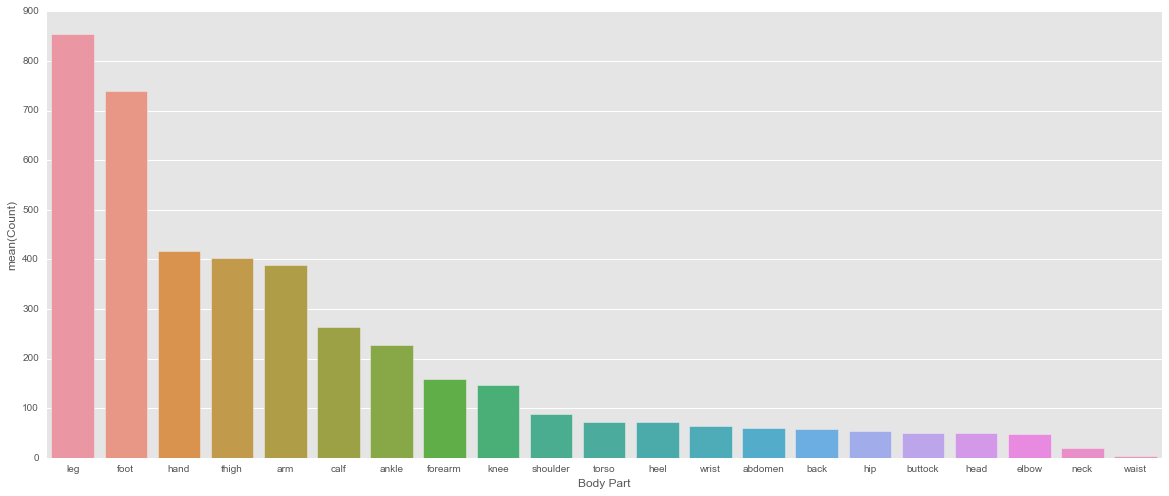

In [7]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.barplot(x = body_parts['Body Part'], y = body_parts['Count'])
plt.ylabel = "Count"
plt.xlabel = "Body Part"

injuries_txt.collocations()

# Turns out people provoke sharks often, limbs are amputated often, and some people die from drowning rather than the puncture wounds.

As we see, many incidents are provoked. 554 of the rows include the word "PROVOKED", which is roughly 10% of the rows. This is interesting, because we don't always think of shark attacks as due to provokation. We also see that legs, feet, hands, thighs, arms, calves, ankles, forearms, and knees are by far the most commonly bit. This is less surprising. Legs (and their parts) are large sections of the human body and logically easier for a shark to grab - very few sharks are large enough to bite/eat the torso of a human successfully. Also, sharks typically are attempting to drag and disorient their prey - or maybe humans are on surfboards and legs/arms are the easiest targets.

Here are some interesting links that describe research on shark attacks from a biological perspective, which could help us understand these numbers.

http://www.discovery.com/tv-shows/shark-week/about-this-show/why-do-sharks-attack/

http://news.nationalgeographic.com/2015/06/150615-north-carolina-shark-attacks-science/

We also created wordclouds from these description columns. This doesn't tell us anything new data-wise, but gives a great representation of the words we see in each of these sections. Unsurprisingly, we see "FATAL", "shark", "leg", "bitten". We see right and left as similarly sized - so there doesn't seem to be any taste preference by sharks for one side or the other.

(-0.5, 815.5, 479.5, -0.5)

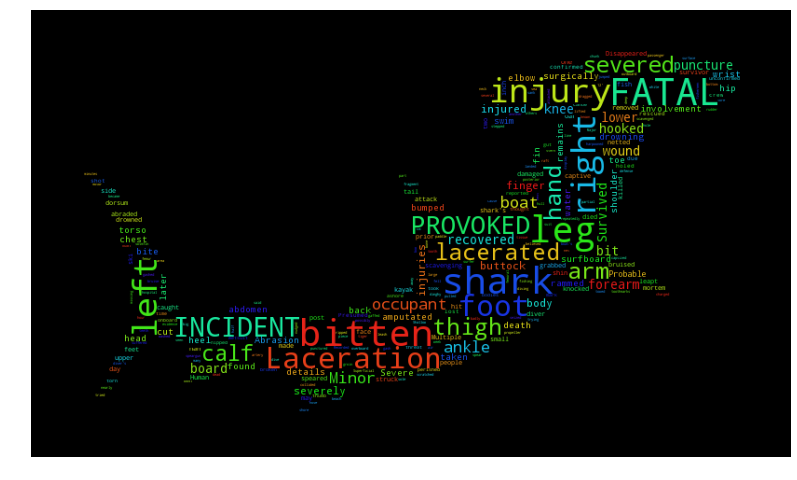

In [8]:
from wordcloud import WordCloud
from PIL import Image
shark_mask = np.array(Image.open("C:/Users/Ellen/Documents/GitHub/FinalProject/shark_mask1.png"))
wordcloud = WordCloud(background_color = "black", mask = shark_mask, max_words = 2000, max_font_size = 40)
injcloud = wordcloud.generate(injtext)
plt.imshow(injcloud)
plt.axis('off')

### Here we re-load the data for Exploration & Machine Learning

We wanted to do some statistcal exploration beyond the description sections, so we decided to look at some of the variables and try to do machine-learning to see if there are any indications of why some attacks are fatal while others are not. 

Let's load in the CSV, we will drop the Case Number and Investigator columns because these are not going to help us predict fatalities in any way. We have over 5700 entries. The data are messy though and need some cleaning before machine learning can take place. There are 18 variables to start. Two will be removed initially as their value is limited. Most are categorical variables. They will need to be converted to numeric values for scikit learn to do its job. 

The label encoder gives a numerical value to the type column. Makes it easier to work with in scikit learn further along. One-Hot encoding would be another way to approach this problem.

In [9]:
shark_attacks = pd.read_csv("attacks.csv", encoding = 'iso-8859-1') #some encoding parameter, unsure why needed?
print(shark_attacks.shape)
shark_attacks=shark_attacks.drop('Case Number', axis=1)
shark_attacks=shark_attacks.drop('Investigator or Source', axis=1)
number = LabelEncoder()
shark_attacks["Type"]=number.fit_transform(shark_attacks["Type"].astype(str))
shark_attacks.head()

(5992, 16)


,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,18-Sep-2016,2016,5,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN
1,18-Sep-2016,2016,5,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN
2,18-Sep-2016,2016,5,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN
3,17-Sep-2016,2016,5,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN
4,16-Sep-2016,2016,5,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark


## Data Exploration

How are attacks changing over time? Are they increasing, decreasing? Can we tell anything about the rate at which this is happening?

Below plots a histogram/bar chart of all the fatal attacks over the last 100 years. After analyzing the output is seems that the most fatal attacks are in the 60's and 70's. This may suggest that people are starting to recreate in the oceans much more than in previous years but maybe the marvels of modern medicine hadn't taken effect yet. There is a chance that people were also not as smart as they are now in terms of preventing attacks. Or potentially something is happening with shark habitat - are people encroaching or are current climate/environmental conditions changing where sharks are commonly feeding?

C:\Users\Ellen\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text xticklabel objects>)

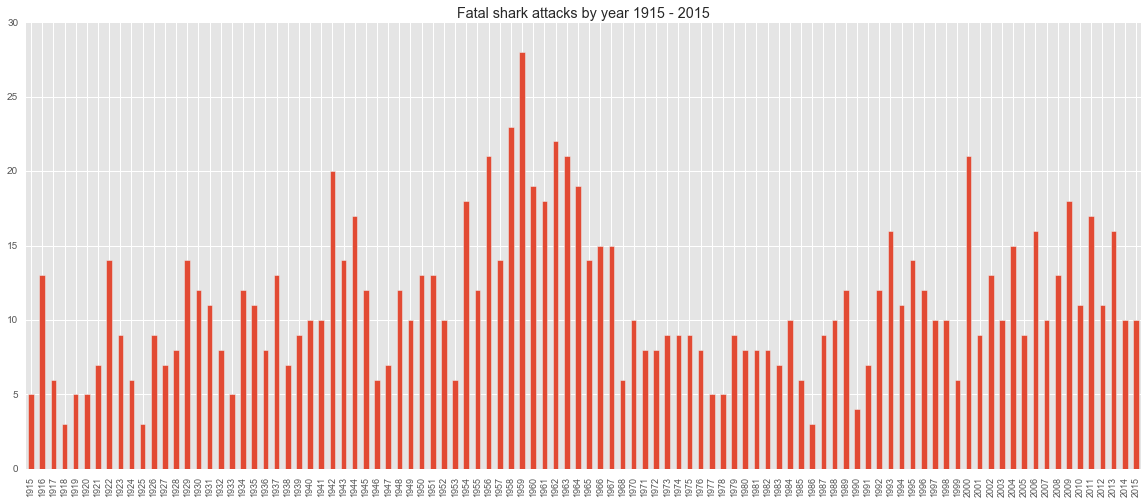

In [10]:
shark_attacks = pd.read_csv("attacks.csv", encoding = 'iso-8859-1') 

shark_attacks['Date'] = shark_attacks['Date'].astype(str)


def find_year(date): #This function tries to extract the year from the dates column
    try:
        matches = [int(y) for y in list(re.findall(r'.*([1-3][0-9]{3})', date))]
        return int(np.mean(matches)) #Some date values containa  range of years
    except:
        return 0

shark_attacks['Year'] = shark_attacks['Date'].apply(find_year)

fatals = shark_attacks[shark_attacks['Fatal (Y/N)'] == 'Y']

startyear, endyear = 1915, 2015
fatals_time = fatals['Year'].value_counts().sort_index(ascending = True).ix[startyear:endyear]
fatals_time.plot(kind = 'bar', title = "Fatal shark attacks by year 1915 - 2015")
plt.xticks(fontsize=9)

For some reason  things likw Sex, FatalY/N and Species will throw an error..."not in index" so this gets around that and renames them in the header index so they can be called. Another way to handle this (in contrast to what was done for the wordcloud feature).

In [11]:

names = list(shark_attacks.columns)
names[9] = 'Sex'
names[12] = 'Fatal'
names[14] = 'Species'
shark_attacks.columns = names

This is a set of functions that will clean the data some. If there are useful entries they will be kept and anything that doesn't make sense or is totally unreasonable will be replace with NaN. This will be easy to distinguish and deal with later. These will work on a few columns seperately for some further exploration and visualizing of the data.

In [12]:
def year_prettify(year):
    if year > 1000: 
        return year
    else:
        return np.nan
    
def sex_prettify(sex):
    if sex == 'M' or sex == 'F':
        return sex
    else:
        return np.nan
    
def age_prettify(age):
    try:
        age = int(age)
    except ValueError:
        age = 0
        
    if (age > 0 and age <= 100):
        return age
    else:
        return np.nan
    
def fatal_prettify(fatal):
    if fatal == 'N' or fatal == 'Y':
        return fatal
    else:
        return np.nan
    
def date_prettify(date):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    num_months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    
    date = str(date)
    if (len(date) == 11 and date[2] == '-'):
        for i in range(len(months)):
            date = date.replace(months[i], num_months[i])
        return date
    else:
        return np.nan

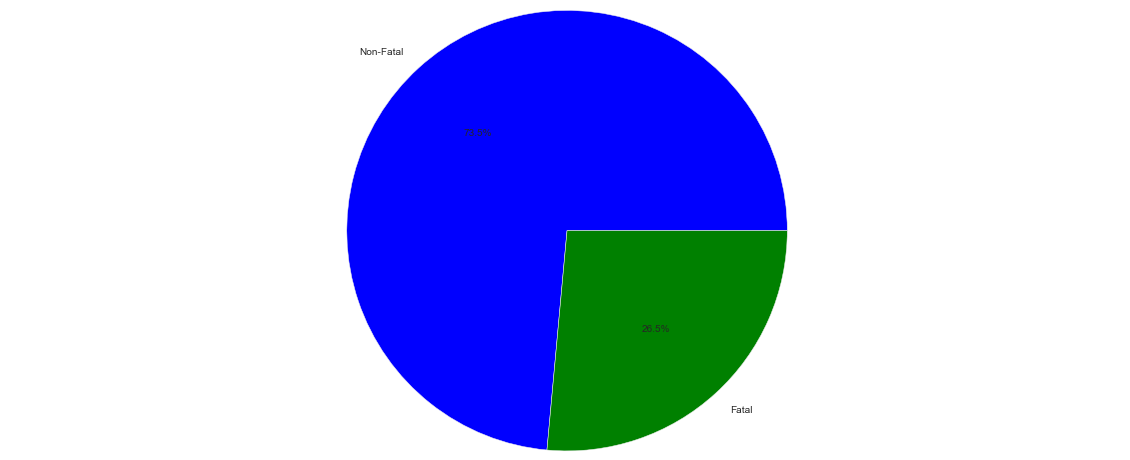

In [13]:
#apply all of the functions from above
shark_attacks['Year'] = shark_attacks['Year'].apply(year_prettify)
shark_attacks['Sex'] = shark_attacks['Sex'].apply(sex_prettify)
shark_attacks['Age'] = shark_attacks['Age'].apply(age_prettify)
shark_attacks['Fatal'] = shark_attacks['Fatal'].apply(fatal_prettify)
shark_attacks['Date'] = shark_attacks['Date'].apply(date_prettify)

#Plot pie charts

fatal_vals = shark_attacks['Fatal'].value_counts().tolist()
sex_vals = shark_attacks['Sex'].value_counts().tolist()
type_vals = shark_attacks['Type'].value_counts().tolist()
labels1 = ['Non-Fatal', 'Fatal']
labels2=['male','female']
plt.pie(fatal_vals, labels=labels1,autopct='%1.1f%%')
axis = plt.axis('equal')

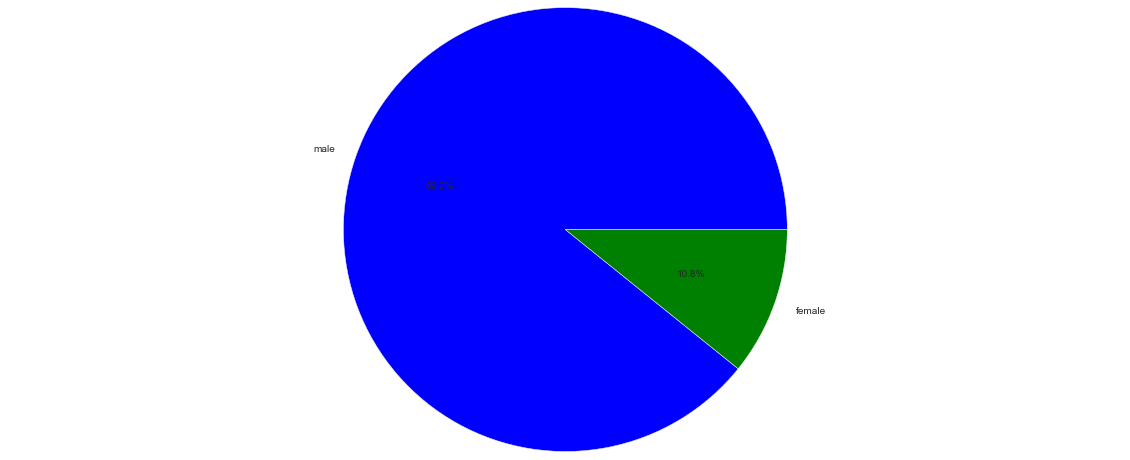

In [14]:
plt.pie(sex_vals, labels=labels2,autopct='%1.1f%%')
axis=plt.axis('equal')

#### Pie Charts

Looking at these tow pie charts we see that:

a) You will likely survive a shark attack. This is great news for those of us who like to recreate in the oceans!

b) Males are way more likely to get attacked in the first place. 

So does this mean that sharks prefer males over females? Probably not, this is potentially a matter of who is more likely to be putting themselves at risk for a shark attack. Historically males are more prevalent in action sports so they represent a higher proportion of the surfers, body-boarders and divers. Many fisherman are also a part of these data. Tradionally males are also a higher portion of workforce and are a contributing factor to this pie chart. So no, sharks don't prefer males, it just happens to be that more males are in the ocean where they might encounter a shark.

The next piece of information we will look at is what age the victims of these attacks are. If we assume that many of the entries are contributed by surfers than we would expect mostly ages in the 20's to 40's.

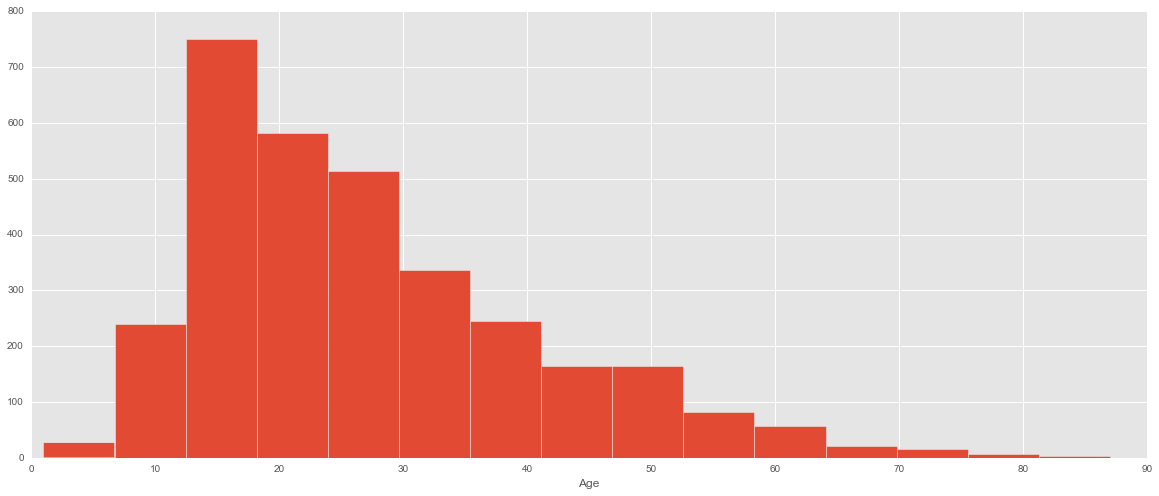

In [15]:
sns.distplot(shark_attacks['Age'].dropna(),  
             hist_kws={"alpha": 1}, 
             kde=False, bins=15)

plt.ylabel="Count"
plt.xlabel="Age"

There is a peak at ages 15-25 roughly. The teen category is higher than expected. The may have been at more risk because of size. Potentially teenagers are doing more high-risk activities (due to incomplete brain development and incomplete understanding of risk). From the wordcloud above we have a sense of what activities are the most dangerous but we will look at the top 30 activities that are the most dangerous. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

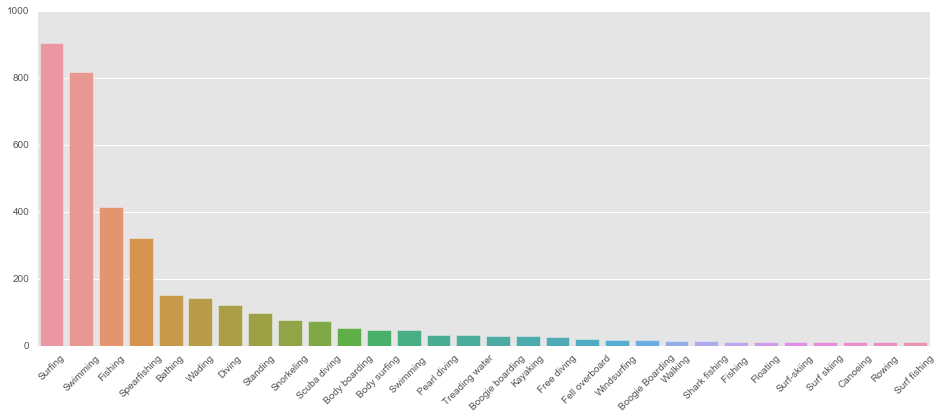

In [16]:
plt.rcParams['figure.figsize'] = (16, 6)
most_common_activities = Counter(shark_attacks['Activity'].dropna().tolist()).most_common(30)
activities = [actv_list[0] for actv_list in most_common_activities]
counts = [actv_list[1] for actv_list in most_common_activities]

sns.barplot(x=activities, y=counts)
plt.ylabel="Count"
plt.xlabel="Age"
plt.xticks(rotation=45)

Here's a word cloud of just activity data!

(-0.5, 399.5, 199.5, -0.5)

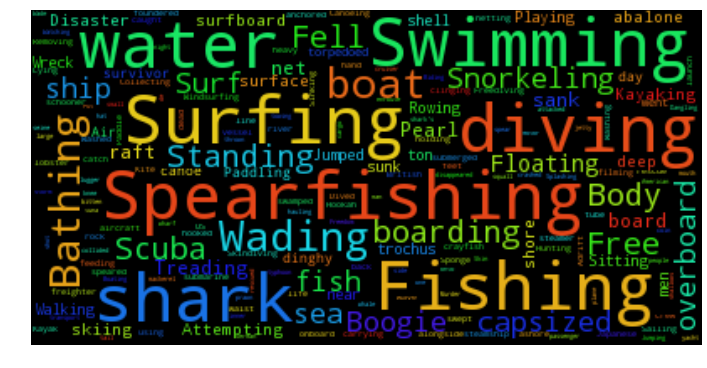

In [17]:
wordcloud = WordCloud(background_color="black", max_words=2000, max_font_size=40, random_state=42)
wordcloud.generate(' '.join(shark_attacks.Activity.dropna().values))
plt.imshow(wordcloud)
plt.axis('off')

We see that towards the end of this list the counts are becoming fairly insignificant in terms of the size of the dataset. There seems to be some overlap with regards to the naming conventions that can be taken care of before doing any supervised learning on the data. We will do the same for the countries that these attacks are occuring in. Activity and country should have some level of predictability when it comes to the unsupervised learning.

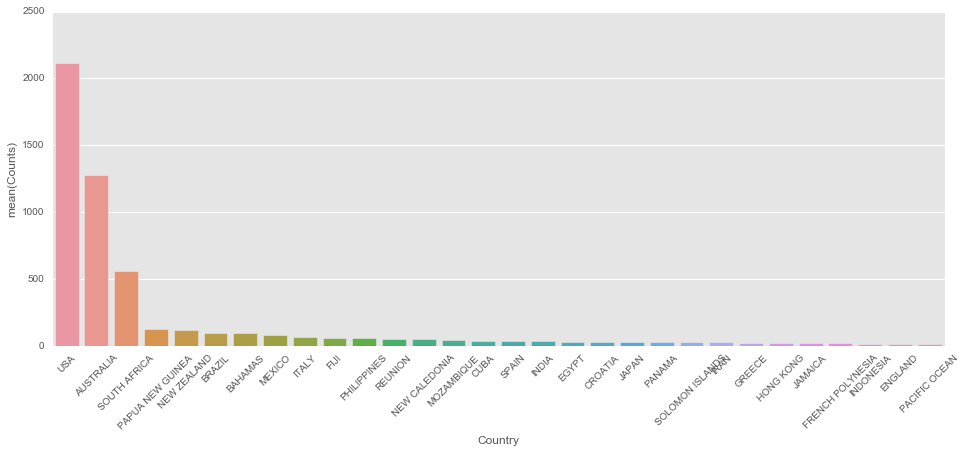

In [18]:
top30countries = shark_attacks.Country.value_counts().head(30)
countries = top30countries.reset_index()
countries.columns = ['Country', 'Counts']
sns.barplot(countries.Country, countries.Counts)
plt.xticks(rotation=45)
plt.show()

It is interesting to note that the United States has by far the highest incidence of shark attacks, followed by Australia and South Africa. The USA has a lot of seashore, as does Australia - so this makes sense. Here's a nice article about shark habitats (specifically Great White Sharks), that may shed light as to why South Africa tops this list as well. Looks like most of the countries on this list have coastlines directly in "Great White" habitat.
http://voices.nationalgeographic.com/2013/02/03/geography-in-the-news-the-great-white-sharks-habitats/

Now, we'll do some more data cleanup and look at some more variables.

In [19]:
#Here we are going to try to do something about the formatting of some of the columns.

shark_attacks = pd.read_csv("attacks.csv", encoding = 'iso-8859-1')
shark_attacks.head()

names = list(shark_attacks.columns)
names[9] = 'Sex'
names[12] = 'Fatal'
names[14] = 'Species'
shark_attacks.columns = names

In [20]:
#if this cell doesn't work re run the above cell, it can only be run once.

shark_attacks['Activity'] = shark_attacks['Activity'].str.lower()
shark_attacks['Activity'] = shark_attacks['Activity'].str.replace('-','')
shark_attacks['Species'] = shark_attacks['Species'].str.lower()
shark_attacks['Country'] = shark_attacks['Country'].str.upper()

shark_attacks.rename(columns={'Fatal (Y/N)':'Fatal','Species ':'Species ','Sex ':'Sex'}, inplace=True)
shark_attacks.drop(['Case Number', 'Investigator or Source'],inplace=True, axis=1)

# clean our Fatal column up
def clean_Fatal(x):
    if x == 'Y':
        return True
    elif x == 'UNKNOWN':
        return ''
    else:
        return False


shark_attacks.Fatal = shark_attacks.Fatal.map(clean_Fatal)


In [21]:
#Functions to fix up dates in a more intuitive way
def year(x):
    res = re.search(r'([0-9]{4})',str(x))
    if res is None:
        return None
    else: 
        return int(res.group())

def day(x):
    res = re.search(r'(^|\b)(([0-9]{2}))(?=-)',str(x))
    if res is None:
        return None
    else:
        return int(res.group())
    
def month(x):
    res = re.search(r'(?!-)(([A-Za-z]{3}))(?=-)',str(x))
    if res is None:
        return None
    else:
        return str(res.group())

shark_attacks['year'] = shark_attacks['Date'].map(year)
shark_attacks['month'] = shark_attacks['Date'].map(month)
shark_attacks['day'] = shark_attacks['Date'].map(day)

shark_attacks.Activity.value_counts()

surfing                                                                                    904
swimming                                                                                   819
fishing                                                                                    414
spearfishing                                                                               321
bathing                                                                                    153
wading                                                                                     144
diving                                                                                     123
standing                                                                                    97
scuba diving                                                                                81
snorkeling                                                                                  77
body boarding                                     

Okay so we know there are a lot of activities and this preview's a few of the more strange examples. For example...."washing a dog" and "conducting a promotional film project for gemni space program" really, thats how a shark attack occurs? Those seem quite random and not ocean related. We may have to work at filtering out some of the less fortunate activities from our dataset.

In [22]:
#
len(shark_attacks[shark_attacks['Activity'].str.contains('diving')==True]['Activity'].value_counts())
shark_attacks[shark_attacks['Activity'].str.contains('diving')==True]['Activity'].value_counts()

def types(x):
    #x = x.encode('utf-8').strip()
    if re.search(r'\bscuba\b',str(x)):
        x='scuba_diving'
        return x
    elif re.search(r"\bspearfishing\b",str(x)) and not(re.search(r'\bscuba\b',str(x))):
        x = 'spear_fishing'
        return x
    elif re.search(r"\bswimming\b",str(x)):
        x = 'swimming'
        return x
    elif re.search(r"\bstanding\b",str(x)):
        x = 'standing'
        return x
    elif re.search("bodysurfing",str(x)) or (re.search("body surfing",str(x))):
        x = 'body_surfing'
        return x
    elif re.search("bodyboarding",str(x)) or (re.search("body-boarding",str(x)))or (re.search("body boarding",str(x))):
        x = 'body_boarding'
        return x
    elif re.search(r"\bsurfing\b",str(x)) or (re.search("surfboard",str(x))):
        x = 'surfing'
        return x
    elif re.search("surf-skiing",str(x)) or (re.search("surf skiing",str(x))) or (re.search("surfskiing",str(x))):
        x = 'surf_skiing'
        return x
    elif re.search("pearl diving",str(x)):
        x = 'pearl_diving'
        return x
    elif re.search(r"\bdiving\b",str(x)):
        x = 'diving'
        return x
    elif re.search(r"\bspear\b",str(x)):
        x = 'spear_fishing'
        return x
    elif re.search(r"\bbathing\b",str(x)):
        x = 'bathing'
        return x
    elif re.search(r"\bfishing\b",str(x)):
        x = 'fishing'
        return x
    elif re.search(r"\bfreediving\b",str(x)) or (re.search("free diving",str(x))):
        x = 'free_diving'
        return x
    elif re.search("boogie",str(x)):
        x = 'boogie_boarding'
        return x
    elif re.search("capsized",str(x)) or (re.search("sank",str(x))) or (re.search("went down",str(x)))     or (re.search("disaster",str(x))) or (re.search("crash",str(x))) or (re.search("wreck",str(x))):
        x = 'sea_disaster'
        return x
    elif re.search(r"\bwading\b",str(x)):
        x = 'wading'
        return x
    else: return x

shark_attacks['Activity'] = shark_attacks['Activity'].map(types)

shark_attacks.Type.value_counts()

Unprovoked      4386
Provoked         557
Invalid          519
Sea Disaster     220
Boat             200
Boating          110
Name: Type, dtype: int64

These long functions above will take all the different variations of activities and converts them all into one common activity to get an accurate count. For example, spear_fishing is the aggregate of things like "spear fishing", "spear-fishing" and spearfishing.Below we will plot and see how the top activities changed.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

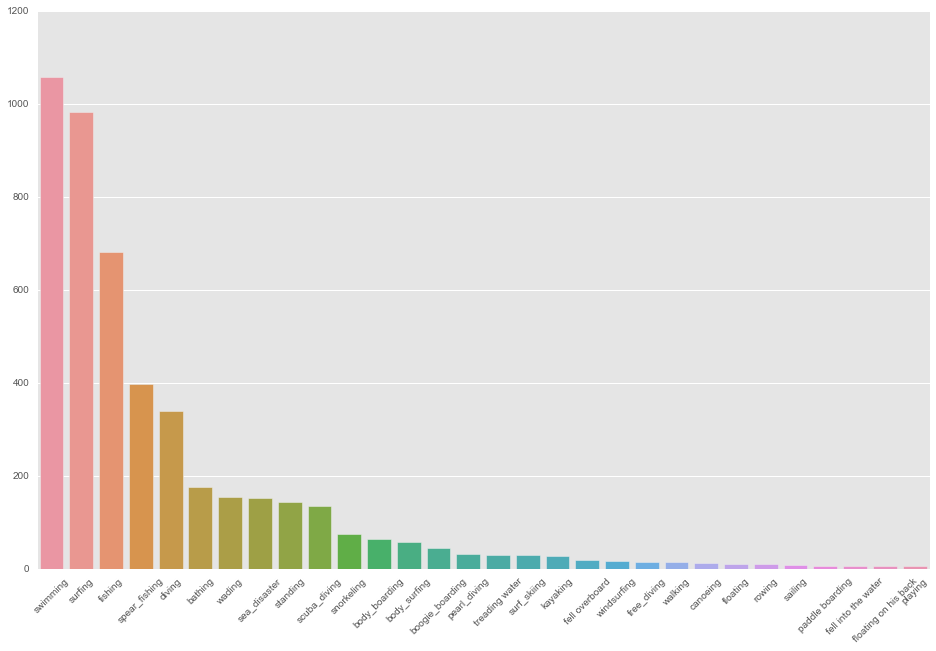

In [23]:
plt.rcParams['figure.figsize'] = (16, 10)
most_common_activities = Counter(shark_attacks['Activity'].dropna().tolist()).most_common(30)
activities = [actv_list[0] for actv_list in most_common_activities]
counts = [actv_list[1] for actv_list in most_common_activities]

sns.barplot(x=activities, y=counts)
plt.ylabel="Count"
plt.xlabel="Age"
plt.xticks(rotation=45)

Okay so we see that if we take into account all the swimmng instances that were not previously lumped together, it takes over the top spot above surfing. This makes sense - when we're swimming we are interacting heavily with the shark's environment. Also, there is some evidence that swimming (creating activity in the water) can attract sharks!

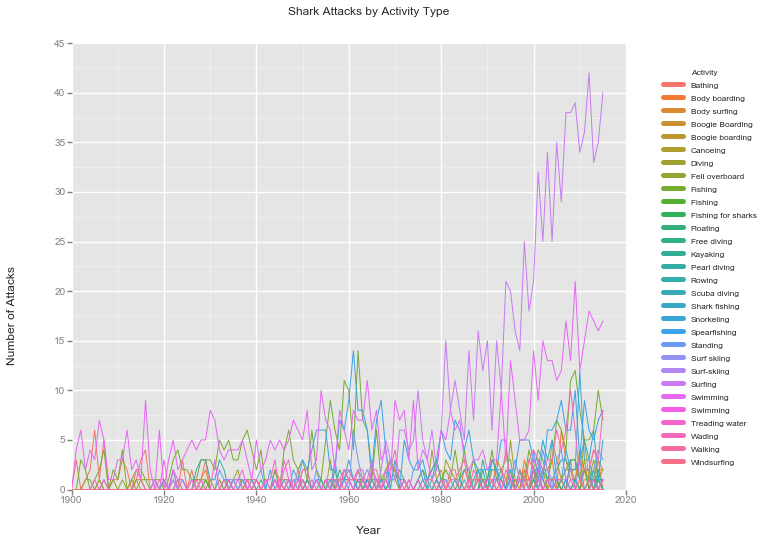

<ggplot: (131250333595)>

In [24]:
# create a plot for top attacks by activity over time
import ggplot
from ggplot import *
shark_attacks2 = pd.read_csv("attacks.csv", encoding = 'iso-8859-1')
top_activities2 = shark_attacks2.Activity.value_counts().index.tolist()[:30]
df_top_activities2 = shark_attacks2[shark_attacks2.Activity.isin(top_activities2) & (shark_attacks2.Year >1900)].dropna(axis=0,subset=['Year'])
df_top_activities2.groupby(['Activity','Year']).count().reset_index()

years = range(1900, 2016)
activities = df_top_activities2.Activity.unique()

def expandgrid(*itrs):
   product = list(itertools.product(*itrs))
   return {'Var{}'.format(i+1):[x[i] for x in product] for i in range(len(itrs))}

all_combos = expandgrid(activities, years)
all_combos = pd.DataFrame(all_combos)
all_combos.columns = ["Activity", "Year"]
all_years = pd.merge(all_combos, df_top_activities2, on=["Year", "Activity"], how='left')
all_years = all_years.groupby(['Activity','Year']).count().reset_index()

ggplot(aes(x='Year', y='Case Number', color='Activity'),all_years) + geom_line() + ylab("Number of Attacks") +\
xlab("Year") + ggtitle("Shark Attacks by Activity Type")

The plot above gives a time series look at all of the attack types trending over time. It is not normalized. We see that attacks are occuring more with time in general. This is probably due to a couple of factors.

1. People are recreating in the ocean more and more. We see this with an increase of deaths such as sufing and body boarding.

2. The reporting and logging of these attacks is improving over time and information is stored more easily. This is facilitated by research groups that put together the Global Shark Attack File.

3. Could sharks be reacting to climate drivers - are they changing habitats based on global climate change. While there is significant evidence for marine life being affected and for shark attacks being on the rise as a result. Here's an article with more information on this idea: http://time.com/4375657/shark-attacks-climate-change/.

In [25]:
### FATAL Attacks
shark_attacks3 = pd.read_csv("attacks.csv", encoding = 'iso-8859-1')

names = list(shark_attacks3.columns)
names[9] = 'Sex'
names[12] = 'Fatal'
names[14] = 'Species'
shark_attacks3.columns = names


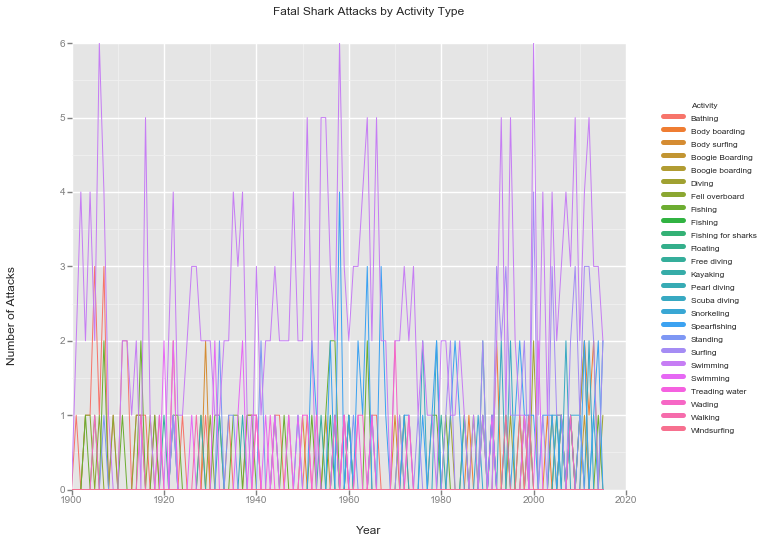

<ggplot: (-9223371905604414439)>

In [26]:
top_activities3 = shark_attacks3.Activity.value_counts().index.tolist()[:30]
shark_attacks_top_activities3 = shark_attacks3[shark_attacks3.Activity.isin(top_activities3) & (shark_attacks3.Year >1900) & (shark_attacks3.Fatal=='Y')].dropna(axis=0,subset=['Year'])
shark_attacks_top_activities3.groupby(['Activity','Year']).count().reset_index()

years = range(1900, 2016)
activities = shark_attacks_top_activities3.Activity.unique()


def expandgrid(*itrs):
    product = list(itertools.product(*itrs))
    return {'Var{}'.format(i+1):[x[i] for x in product] for i in range(len(itrs))}

all_combos = expandgrid(activities, years)
all_combos = pd.DataFrame(all_combos)
all_combos.columns = ["Activity", "Year"]
all_years = pd.merge(all_combos, shark_attacks_top_activities3, on=["Year", "Activity"], how='left')
all_years = all_years.groupby(['Activity','Year']).count().reset_index()

ggplot(aes(x='Year', y='Case Number', color='Activity'),all_years) + geom_line() + ylab("Number of Attacks") +\
    xlab("Year") + ggtitle("Fatal Shark Attacks by Activity Type")

This cell shows the same information but is limited to Fatal shark attacks. Here we can see that in general less fatal attacks are occuring. This could be due to advances in medical care. In the 50's a simple bite may have become infected easier or rescue times could have been longer resulting in a death, where today the victim may have survived.

#### Using only the most common occurances of activity and country

Okay so we will now only keep the top activities and top countries to use them for predictive power. This next block of code counts up all occurances of each activity then will keep the top 30. Once the top 30 is known it will only keep rows in the dataframe with these "top" activities or countries.

In [27]:
#Get all the most common activities
most_common_activities = Counter(shark_attacks['Activity'].dropna().tolist()).most_common(30)
#This generates a list of tuples, the activity and the counts for each activity. We want to only pull out activities.
#This next line pulls out first element in the tuple
most_common_activities = [str(i[0]) for i in most_common_activities]
most_common_countries = Counter(shark_attacks['Country'].dropna().tolist()).most_common(30)
most_common_countries = [str(i[0]) for i in most_common_countries]
print(most_common_activities)
print(len(most_common_activities))
print(most_common_countries)
print(len(most_common_countries))
shark_attacks_top_activities = shark_attacks[shark_attacks.Activity.isin(most_common_activities)]
#shark_attacks_top_activities=shark_attacks_top_activities.groupby(['Activity','Year']).count().reset_index()
#shark_attacks_top_activities= shark_attacks_top_activities[shark_attacks.Activity.isin(most_common_countries)]
shark_attacks_top_activity_country = shark_attacks_top_activities[shark_attacks.Country.isin(most_common_countries)]
print(shark_attacks_top_activity_country.shape)
#shark_attacks_top_activity_country.head()

['swimming', 'surfing', 'fishing', 'spear_fishing', 'diving', 'bathing', 'wading', 'sea_disaster', 'standing', 'scuba_diving', 'snorkeling', 'body_boarding', 'body_surfing', 'boogie_boarding', 'pearl_diving', 'treading water', 'surf_skiing', 'kayaking', 'fell overboard', 'windsurfing', 'free_diving', 'walking', 'canoeing', 'floating', 'rowing', 'sailing', 'paddle boarding', 'fell into the water', 'floating on his back', 'playing']
30
['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'PAPUA NEW GUINEA', 'NEW ZEALAND', 'BRAZIL', 'BAHAMAS', 'MEXICO', 'ITALY', 'FIJI', 'PHILIPPINES', 'REUNION', 'NEW CALEDONIA', 'MOZAMBIQUE', 'CUBA', 'SPAIN', 'INDIA', 'EGYPT', 'CROATIA', 'PANAMA', 'JAPAN', 'IRAN', 'SOLOMON ISLANDS', 'GREECE', 'HONG KONG', 'JAMAICA', 'FRENCH POLYNESIA', 'INDONESIA', 'ENGLAND', 'PACIFIC OCEAN']
30
(4274, 17)


C:\Users\Ellen\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


 Okay so it looks like it worked. When keeping on the top activities and countries we see that we retain 4273 rows of the dataframe. So by only looking at the top 30 when there are 100's to 1000's of variables we can account for 71% of the dataset. Not bad, considering the size 71% still gives us lots to work with. 
 
### One-Hot Encoding

Because of the sheer amount of categorical variables a new pre-processing step must be included for sci-kit learn. We need all of the categorical labels to become numeric, this can be done by assigning a number 1-30 for each of the top 30 activities or countries or it can be done using one-hot encoding. This essentially adds a column for each variable and gives the row a binary value for each column. Pandas has a useful built-in function for this called get_dummies.

In [28]:
#One hot encode columns
print(shark_attacks_top_activity_country.shape)
dummy_activities=pd.get_dummies(shark_attacks_top_activity_country, columns=['Activity','Country',"Type",'Sex'])
print(dummy_activities.shape)
dummy_activities.head()
#Okay so we see here we added 29 new columns each time we did the get_dummies.
#This makes sense because we needed to add a column for each of the 30 top activities or countries.

(4274, 17)
(4274, 84)


,Date,Year,Area,Location,Name,Age,Injury,Fatal,Time,Species,...,Type_Boating,Type_Invalid,Type_Provoked,Type_Sea Disaster,Type_Unprovoked,Sex_F,Sex_M,Sex_M,Sex_N,Sex_lli
0,18-Sep-2016,2016,Florida,"New Smyrna Beach, Volusia County",male,16,Minor injury to thigh,False,13h00,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,18-Sep-2016,2016,Florida,"New Smyrna Beach, Volusia County",Chucky Luciano,36,Lacerations to hands,False,11h00,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,18-Sep-2016,2016,Florida,"New Smyrna Beach, Volusia County",male,43,Lacerations to lower leg,False,10h43,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,17-Sep-2016,2016,Victoria,Thirteenth Beach,Rory Angiolella,NaN,Struck by fin on chest & leg,False,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,16-Sep-2016,2016,Victoria,Bells Beach,male,NaN,No injury: Knocked off board by shark,False,NaN,2 m shark,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [29]:
most_common_outcome = Counter(dummy_activities['Fatal'].dropna().tolist()).most_common(30)
print(most_common_outcome)
#We see most survive
#Lets map these to 0 and 1 for survived=0 and perished=1
def fatal_to_numeric(x):
    if x==False:
        return 0
    if x==True:
        return 1
    else:
        return 'unknown'

dummy_activities["Fatal"] = dummy_activities["Fatal"].apply(fatal_to_numeric)
#dummy_activities.head()

[(False, 3295), (True, 946), ('', 33)]


In [30]:
# Geospatial Shark
country_info = pd.read_csv("demo_3.csv", encoding = 'iso-8859-1')

result=pd.merge(country_info, shark_attacks_top_activity_country, on='Country')
print(result)

            Country        Lat        Long     Density  \
0               USA  37.090240  -95.712891   32.703724   
1               USA  37.090240  -95.712891   32.703724   
2               USA  37.090240  -95.712891   32.703724   
3               USA  37.090240  -95.712891   32.703724   
4               USA  37.090240  -95.712891   32.703724   
5               USA  37.090240  -95.712891   32.703724   
6               USA  37.090240  -95.712891   32.703724   
7               USA  37.090240  -95.712891   32.703724   
8               USA  37.090240  -95.712891   32.703724   
9               USA  37.090240  -95.712891   32.703724   
10              USA  37.090240  -95.712891   32.703724   
11              USA  37.090240  -95.712891   32.703724   
12              USA  37.090240  -95.712891   32.703724   
13              USA  37.090240  -95.712891   32.703724   
14              USA  37.090240  -95.712891   32.703724   
15              USA  37.090240  -95.712891   32.703724   
16            

In [31]:
aggregated1 = shark_attacks_top_activity_country[['Country','Fatal (Y/N)']].groupby("Country").count()
print(aggregated1)
#country_fata_density=pd.merge(country_info, aggregated1, on='Country')
#print(country_fata_density)


d1=country_info.set_index('Country', drop=False)
country_fata_density=pd.concat([d1, aggregated1], axis=1,join_axes=[aggregated1.index])
country_fata_density[['Fatal']]=country_fata_density[['Fatal (Y/N)']]
country_fata_density.drop('Fatal (Y/N)',1)
print(country_fata_density)

KeyError: "['Fatal (Y/N)'] not in index"

In [32]:
##Linear Regression Sharks
import statsmodels.formula.api as sm

model1 = sm.ols(formula="Fatal ~ Density", data=country_fata_density)
model1_result = model1.fit()
print(model1_result.params[0], '\n', model1_result.params[1])
print(model1_result.summary())

NameError: name 'country_fata_density' is not defined

In [33]:
import numpy as np
from ggplot import *
import matplotlib.cm as cm



import folium
map1 = folium.Map(location=[40.7736, -111.8750],
                   zoom_start=1,
                   tiles='Stamen Terrain')
df_map=result[['Long','Lat','Density']]


for i in range(0,len(df_map)):
        folium.Marker(location=[df_map.iloc[i]['Lat'], df_map.iloc[i]['Long']],
              popup=str(df_map.iloc[i]['Density']),          
              icon=folium.Icon(color=df_map.iloc[i]['Density'])
             ).add_to(map1)

        
map1

ImportError: No module named 'folium'

### Test and Training

We have now one-hot encoded the dataframe, let's go ahead and drop al of our categorical columns so we only have binary entries.This will give us a 72 column df with onehot encoded variables.


In [34]:
#Only run this once, if it doesn't work run the two previous code cells.

a= ['Date', 'Year', 'Area','Location','Name','Age','Injury','Species', 'Time', 'year', 'month','day']
dummy_activities=dummy_activities.drop(a, axis=1)

activity_cols = [col for col in dummy_activities.columns if 'Activity' in col]
country_cols = [col for col in dummy_activities.columns if 'Country' in col]
type_cols = [col for col in dummy_activities.columns if 'Type' in col]
sex_cols = [col for col in dummy_activities.columns if 'Sex' in col]
#dummy_activities.head()

Let's separate the one hot variables into their own separate dataframes so we can use each for predictive. We will be let with a list of binary columns for activities, countries, type and sex parsed together with the Fatal column which is our result.

In [35]:
df=dummy_activities.drop(activity_cols, axis=1)
df=df.drop(country_cols, axis=1)
df=df.drop(type_cols, axis=1)
df=df.drop('Sex_N',axis=1)
df=df.drop('Sex_M ',axis=1)
dummies_sexcols=df.drop('Sex_lli',axis=1)

df=dummy_activities.drop(sex_cols, axis=1)
df=df.drop(country_cols, axis=1)
dummies_activitycols=df.drop(type_cols, axis=1)

df=dummy_activities.drop(sex_cols, axis=1)
df=df.drop(country_cols, axis=1)
dummies_typecols=df.drop(activity_cols, axis=1)

df=dummy_activities.drop(sex_cols, axis=1)
df=df.drop(type_cols, axis=1)
dummies_countrycols=df.drop(activity_cols, axis=1)
dummies_activitycols.to_csv('out.csv', index=False)

## Machine Learning Section

### K-Nearest Neighbors

First we will import all of the sci-kit learn packages for supervised learning (at the beginning). We will use cross validations to compute acuracy of the test data with 5 different splits. These splits are then averaged for a final accuracy score. The distributions of each of the mean accuracies is given. The data is partitioned into the outcome or variable that is to be predicted "Fatal or not" and then a set of feature columns of the activities, countries, sex of victim and type of attack. The features are what is used as predictive variables.

In [36]:
# convert to matrix so we can work with it
X = list(dummy_activities.drop(['Fatal'], axis=1).as_matrix())
shares = list(df['Fatal'].as_matrix())

# correct labels
y = shares

We will use sci-kit learn's K-neighbors classifier and then cross_val_score to cross validate results.Our first iteration below will be performed on all of the predictive variables at once (Activity, Country, Type, Sex)

#### All Variables

In [37]:
n_neighbors = np.array([1, 5, 10, 25, 30, 35, 40, 50])

for ind,k in enumerate(n_neighbors):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=5)
    print(k)
    print(scores)
    print(scores.mean())
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


1
[ 0.77102804  0.80116959  0.81871345  0.71896956  0.59484778]
0.740945681706
Accuracy: 0.74 (+/- 0.16)
5
[ 0.77803738  0.79649123  0.80584795  0.73419204  0.68852459]
0.76061863842
Accuracy: 0.76 (+/- 0.09)
10
[ 0.7838785   0.7871345   0.76608187  0.72716628  0.68852459]
0.75055714909
Accuracy: 0.75 (+/- 0.08)
25
[ 0.77920561  0.7871345   0.79415205  0.75175644  0.70140515]
0.762730749938
Accuracy: 0.76 (+/- 0.07)
30
[ 0.77453271  0.79064327  0.79415205  0.764637    0.70608899]
0.766010805447
Accuracy: 0.77 (+/- 0.06)
35
[ 0.77453271  0.79181287  0.78947368  0.76346604  0.71194379]
0.766245819211
Accuracy: 0.77 (+/- 0.06)
40
[ 0.77570093  0.79298246  0.79181287  0.76112412  0.66744731]
0.757813536958
Accuracy: 0.76 (+/- 0.09)
50
[ 0.77102804  0.79064327  0.78596491  0.76112412  0.66393443]
0.754538954505
Accuracy: 0.75 (+/- 0.09)


We will now plot the accuracies against k to see if there is an elbow in the plot that will allow us to select the best k.

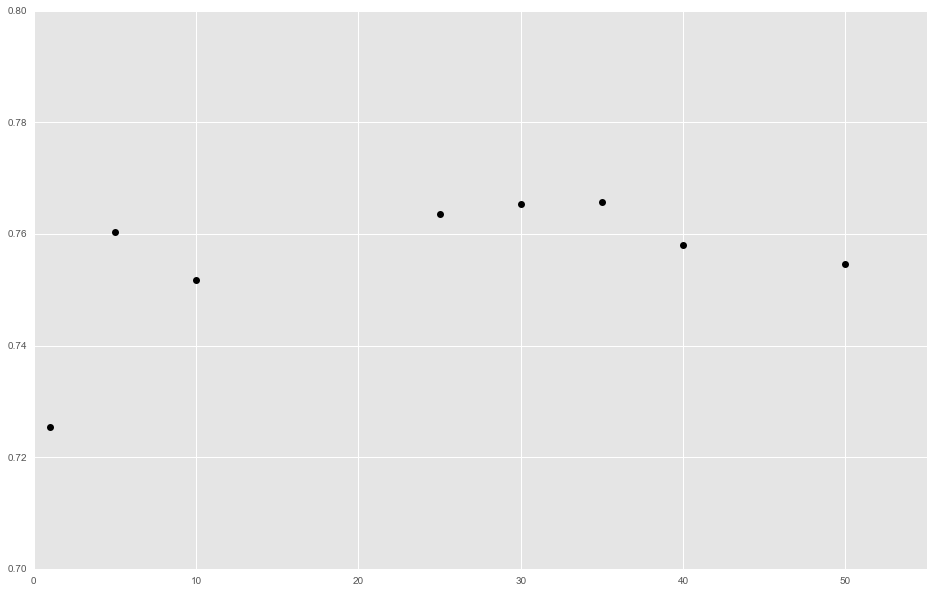

In [38]:
scores=[0.72546729, 0.760385268109, 0.751728108638, 0.763667791997,0.765308503243, 0.765777435136, 0.758047455086, 0.754538954505]
p1=plt.plot(n_neighbors, scores, 'ko')
plt.xlim([0, 55])
plt.ylim([0.7 , 0.8])
plt.show()

After looping through several values of k in the classificaton we see that the highest accuracy achieved is about 77% on the test data and this occurs betwen k=30 and k=35. This is where the plot flattens out and the slope becomes negative. K=30-35 is our best choice in this situation. Next we will see if we can do better by using different combinations or only a subset of the predictor variables to see if there is any over-fitting going on here.

#### Activity

In [39]:
#Only using Activity as predictor
X = list(dummies_activitycols.drop(['Fatal'], axis=1).as_matrix())
shares = list(df['Fatal'].as_matrix())

# correct labels
y = shares

In [40]:
n_neighbors = np.array([1, 5, 10, 25, 30, 35, 40, 50, 75, 100,1000])

for ind,k in enumerate(n_neighbors):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=5)
    print(k)
    print(scores)
    print(scores.mean())
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


1
[ 0.76985981  0.76842105  0.74619883  0.69437939  0.70725995]
0.737223808077
Accuracy: 0.74 (+/- 0.06)
5
[ 0.77686916  0.78128655  0.74502924  0.7412178   0.70843091]
0.750566732059
Accuracy: 0.75 (+/- 0.05)
10
[ 0.77686916  0.78128655  0.76842105  0.71545667  0.64637002]
0.737680691822
Accuracy: 0.74 (+/- 0.10)
25
[ 0.77686916  0.79064327  0.79064327  0.77985948  0.72248244]
0.772099525792
Accuracy: 0.77 (+/- 0.05)
30
[ 0.77686916  0.79064327  0.79064327  0.79391101  0.72248244]
0.774909830242
Accuracy: 0.77 (+/- 0.05)
35
[ 0.77686916  0.79064327  0.79064327  0.77283372  0.72248244]
0.770694373567
Accuracy: 0.77 (+/- 0.05)
40
[ 0.77686916  0.79064327  0.79064327  0.77283372  0.72248244]
0.770694373567
Accuracy: 0.77 (+/- 0.05)
50
[ 0.77570093  0.79064327  0.76725146  0.77283372  0.72248244]
0.765782366134
Accuracy: 0.77 (+/- 0.05)
75
[ 0.77570093  0.79064327  0.79064327  0.77283372  0.72248244]
0.770460728708
Accuracy: 0.77 (+/- 0.05)
100
[ 0.77570093  0.79298246  0.79064327  0.7728

#### Country

In [41]:
#Only using Country as predictor
X = list(dummies_countrycols.drop(['Fatal'], axis=1).as_matrix())
shares = list(df['Fatal'].as_matrix())

# correct labels
y = shares

n_neighbors = np.array([1, 5, 10, 25, 30, 35, 40, 50, 75, 100,1000])

for ind,k in enumerate(n_neighbors):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=5)
    print(k)
    print(scores)
    print(scores.mean())
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


1
[ 0.6588785   0.74035088  0.6877193   0.60070258  0.70960187]
0.679450625952
Accuracy: 0.68 (+/- 0.10)
5
[ 0.76635514  0.77192982  0.77309942  0.76229508  0.76814988]
0.768365868965
Accuracy: 0.77 (+/- 0.01)
10
[ 0.76752336  0.76608187  0.78362573  0.76346604  0.76580796]
0.769300994302
Accuracy: 0.77 (+/- 0.01)
25
[ 0.77102804  0.76842105  0.80584795  0.70960187  0.76697892]
0.764375567897
Accuracy: 0.76 (+/- 0.06)
30
[ 0.76752336  0.76842105  0.78362573  0.70960187  0.76697892]
0.759230188873
Accuracy: 0.76 (+/- 0.05)
35
[ 0.76752336  0.76842105  0.76959064  0.7295082   0.76697892]
0.760404435966
Accuracy: 0.76 (+/- 0.03)
40
[ 0.76752336  0.76842105  0.74035088  0.73067916  0.76697892]
0.754790674787
Accuracy: 0.75 (+/- 0.03)
50
[ 0.76635514  0.77076023  0.74502924  0.73067916  0.76112412]
0.754789578512
Accuracy: 0.75 (+/- 0.03)
75
[ 0.76985981  0.77076023  0.77426901  0.72833724  0.77166276]
0.76297781057
Accuracy: 0.76 (+/- 0.03)
100
[ 0.76985981  0.77076023  0.77426901  0.76814

#### Type

In [42]:
#Only using type as predictor
X = list(dummies_typecols.drop(['Fatal'], axis=1).as_matrix())
shares = list(df['Fatal'].as_matrix())

# correct labels
y = shares

n_neighbors = np.array([1, 5, 10, 25, 30, 35, 40, 50, 75, 100,1000])

for ind,k in enumerate(n_neighbors):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=5)
    print(k)
    print(scores)
    print(scores.mean())
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


1
[ 0.77570093  0.77076023  0.76842105  0.71779859  0.77166276]
0.760868715889
Accuracy: 0.76 (+/- 0.04)
5
[ 0.77453271  0.79181287  0.76842105  0.77166276  0.77166276]
0.775618431068
Accuracy: 0.78 (+/- 0.02)
10
[ 0.77453271  0.79181287  0.78479532  0.77400468  0.76932084]
0.778893284869
Accuracy: 0.78 (+/- 0.02)
25
[ 0.77453271  0.77076023  0.78479532  0.77400468  0.76932084]
0.774682758554
Accuracy: 0.77 (+/- 0.01)
30
[ 0.77453271  0.77076023  0.78479532  0.77400468  0.76932084]
0.774682758554
Accuracy: 0.77 (+/- 0.01)
35
[ 0.77453271  0.79181287  0.78479532  0.77400468  0.76932084]
0.778893284869
Accuracy: 0.78 (+/- 0.02)
40
[ 0.77453271  0.79181287  0.78479532  0.77400468  0.76932084]
0.778893284869
Accuracy: 0.78 (+/- 0.02)
50
[ 0.77453271  0.79181287  0.78479532  0.77400468  0.76932084]
0.778893284869
Accuracy: 0.78 (+/- 0.02)
75
[ 0.77453271  0.79181287  0.78245614  0.77400468  0.76932084]
0.778425448612
Accuracy: 0.78 (+/- 0.02)
100
[ 0.77453271  0.77076023  0.77076023  0.7740

#### Sex

In [43]:
#Only using Sex as predictor
X = list(dummies_sexcols.drop(['Fatal'], axis=1).as_matrix())
shares = list(df['Fatal'].as_matrix())

# correct labels
y = shares

n_neighbors = np.array([1, 5, 10, 25, 30, 35, 40, 50, 75, 100,1000])

for ind,k in enumerate(n_neighbors):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=5)
    print(k)
    print(scores)
    print(scores.mean())
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


1
[ 0.6682243   0.77076023  0.77076023  0.77166276  0.74473068]
0.745227641905
Accuracy: 0.75 (+/- 0.08)
5
[ 0.76985981  0.77076023  0.77076023  0.77166276  0.77166276]
0.77094116157
Accuracy: 0.77 (+/- 0.00)
10
[ 0.76985981  0.77076023  0.77076023  0.77166276  0.77166276]
0.77094116157
Accuracy: 0.77 (+/- 0.00)
25
[ 0.76985981  0.77076023  0.77076023  0.77166276  0.77166276]
0.77094116157
Accuracy: 0.77 (+/- 0.00)
30
[ 0.76985981  0.77076023  0.77076023  0.77166276  0.77166276]
0.77094116157
Accuracy: 0.77 (+/- 0.00)
35
[ 0.76985981  0.77076023  0.77076023  0.77166276  0.77166276]
0.77094116157
Accuracy: 0.77 (+/- 0.00)
40
[ 0.76985981  0.77076023  0.77076023  0.77166276  0.77166276]
0.77094116157
Accuracy: 0.77 (+/- 0.00)
50
[ 0.76985981  0.77076023  0.77076023  0.77166276  0.77166276]
0.77094116157
Accuracy: 0.77 (+/- 0.00)
75
[ 0.76985981  0.77076023  0.77076023  0.77166276  0.77166276]
0.77094116157
Accuracy: 0.77 (+/- 0.00)
100
[ 0.76985981  0.77076023  0.77076023  0.77166276  0.

### Predictive Power

We see our predictive power is fairly limited using kNN. It levels off around 77% everytime. This is better than guessing but none of the models show promising results. It turns out that the choice of variables for making predictions was not the best. It is difficult to get a robust classifier on almost entirely categorical data. Trying to say one type of activity or one country is better than another is impossible. For example in the Titanic example we had fares or ticket lasses which you can say that a more expensive class is in fact better. Therefore if you had more money you would be more likely to survive. In our case a shark has no preference to these type of situations and we don't have any predictors that say, make you more delicious to a shark.

## SVM

Below we will do a similar analysis with Support Vector Machines. Since we don't have a compelling argument that a certain combination of the predictor variables has a stronger influence than another we will go ahead and use them all for SVM and Decision Trees.

In [44]:
# Fix sklearn imports for next section.
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, cross_val_predict, cross_val_score, KFold

In [45]:
# redefine X and y so we can use all variables again
X = list(dummy_activities.drop(['Fatal'], axis=1).as_matrix())
shares = list(df['Fatal'].as_matrix())

# correct labels
y = shares

#for ind,k in enumerate(n_neighbors):
svm_model = svm.SVC(kernel='rbf')
y_pred = cross_val_predict(svm_model, X, y, cv=5)
model_acc = metrics.accuracy_score(y_true=y, y_pred=y_pred)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[ 0.76985981  0.77076023  0.77076023  0.77166276  0.77166276]
Accuracy: 0.77 (+/- 0.00)


We see that using SVM is no slower than a cross validated kNN model that loops through k values. However, it doesn't add much value to the accuracy. Is it better or worse: hard to say. Just another way to attack a ill-posed problem maybe is the best way of putting it.

## Decision Trees

Below we use sci-kit learn's decision tree classifier. The loop allows us to predict how many levels to limit the decision tree to as we will be able to see when accuracy drops off in the results. This can be to over-complicating the tree. 

In [46]:
depth=[1,2,3,4,5,10,20,50,5]
for i in depth:
    max_depth = i
    min_samples_split = 200
    tree_model = tree.DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    y_pred = cross_val_predict(tree_model, X, y, cv=2)
    model_acc = metrics.accuracy_score(y_true=y, y_pred=y_pred)
    print(i)
    print(model_acc)

1
0.770940570894
2
0.777257838091
3
0.781469349555
4
0.76368741226
5
0.772578380908
10
0.753392606458
20
0.747075339261
50
0.746841366401
5
0.772578380908


We see that if we limit the tree depth to 3 we achieve the highest accuracy. Below we will plot a visual of the tree for a max depth=5 to see how this is working.

In [47]:
# render the tree
from IPython.display import Image, display  
import pydotplus 
from scipy import misc

def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features, 
                                 class_names=["Perished", "Survived"],  
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))
    
    
#print the tree on the whole dataset
all_features = dummy_activities.columns.values

# build tree on all data
decisionTree = tree_model.fit(X, y)
renderTree(decisionTree, all_features)

InvocationException: GraphViz's executables not found

### Geospatial Distribution of Shark Attacks
We want to understand the geospatial distribution of shark attacks. Do they happen in some countries more than others? Is there any rationale behind this (population density?) or could we attribute it to more coastline, shark habitats, higher nautical leisure activities, or more reporting? What information can we glean from geospatial distributions?

In [48]:
country_info = pd.read_csv("demo_3.csv", encoding = 'iso-8859-1')
result=pd.merge(country_info, shark_attacks_top_activity_country, on='Country')
#print(result)

#from mpl_toolkits.basemap import Basemap 
import numpy as np
from ggplot import *
import matplotlib.cm as cm
import folium
map1 = folium.Map(location=[40.7736, -111.8750],
                   zoom_start=1,
                   tiles='Stamen Terrain')
df_map=result[['Long','Lat','Density']]

for i in range(0,len(df_map)):
        folium.Marker(location=[df_map.iloc[i]['Lat'], df_map.iloc[i]['Long']],
              popup=str(df_map.iloc[i]['Density']),          
              icon=folium.Icon(color=df_map.iloc[i]['Density'])
             ).add_to(map1)
        
map1

ImportError: No module named 'folium'

# Dogs

So we weren't able to do all of the same decision trees and machine learning with dogs and with bears, but we still wanted to investigate some of the Natural Language Processing for the other two animal attacks categories, so that is what follows!

In [49]:
# Dog Data Import & Cleaning
url = 'https://en.wikipedia.org/wiki/Fatal_dog_attacks_in_the_United_States'
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html, "lxml")

list_of_rows = []
for table in soup.findAll('table', {'class': 'wikitable sortable'})[1:67]:
    # remove all extra tags in the HTML Tables
    for div in soup.findAll('span', 'sortkey'):
        div.extract();
    for div in soup.findAll('span', {'style':'display:none'}):
        div.extract();
    #scan through table
    for row in table.findAll('tr')[1:]:
        list_of_cells = []
        for cell in row.findAll('td'):
            list_of_cells.append(cell.text)
        list_of_rows.append(list_of_cells)
dog_attacks = pd.DataFrame(list_of_rows, columns = ['Date','Category of Dog', 'Victims Name', 'Victims Age', 'Circumstances'])
dog_attacks.head()

list_of_rows = []
for table in soup.findAll('table', {'class': 'wikitable sortable'})[67:]:
    # remove all extra tags in the HTML Tables
    for div in soup.findAll('span', 'sortkey'):
        div.extract();
    for div in soup.findAll('span', {'style':'display:none'}):
        div.extract();
    #scan through table
    for row in table.findAll('tr')[1:]:
        list_of_cells = []
        for cell in row.findAll('td'):
            list_of_cells.append(cell.text)
        list_of_rows.append(list_of_cells)
dog_attacks2 = pd.DataFrame(list_of_rows, columns = ['Date', 'Location', 'Victims Name', 'Victims Age', 'Category of Dog', 'Circumstances', 'Empty'])
dog_attacks2.drop('Empty', axis = 1, inplace = True)

In [50]:
# Dog data cleanup & organization
dog_attacks2 = dog_attacks2[['Date',  'Category of Dog', 'Victims Name', 'Victims Age', 'Circumstances','Location']]
#adding location column to dog_attacks, first with random numbers then replace with "Unknown"
dog_attacks['Location'] = pd.Series(np.random.randn(len(dog_attacks['Date'])), index=dog_attacks.index)
dog_attacks.loc[dog_attacks['Location'] != 0, 'Location'] = "Unknown"
#concatenate the two dataframes to get all dog attacks together
frames = (dog_attacks, dog_attacks2)
dog_attacks_all = pd.concat(frames)
dog_attacks_all=dog_attacks_all.reset_index(drop=True)
#adding year data to each dog attack
#apples=[]
#for heading in soup.findAll(class_="mw-headline"):
#    a=heading.get_text('span')
#    apples.append(a)
#pd.DataFrame(apples)

pd.set_option('display.max_rows', 1000)

#This matches the correct year to each row in the dataframe. 
dog_attacks_all["Year"] = np.nan
dog_attacks_all.set_value(0, 'Year', '1891')
dog_attacks_all.set_value(1, 'Year', '1896')
dog_attacks_all.set_value(2, 'Year', '1901')
dog_attacks_all.set_value(3, 'Year', '1904')
dog_attacks_all.set_value(4, 'Year', '1912')
dog_attacks_all.set_value(5, 'Year', '1912')
dog_attacks_all.set_value(6, 'Year', '1934')
dog_attacks_all.set_value(7, 'Year', '1936')
dog_attacks_all.set_value(8, 'Year', '1937')
dog_attacks_all.set_value(9, 'Year', '1939')
dog_attacks_all.set_value(10, 'Year', '1939')
dog_attacks_all.set_value(11, 'Year', '1942')
dog_attacks_all.set_value(12, 'Year', '1943')
dog_attacks_all.set_value(13, 'Year', '1945')
dog_attacks_all.set_value(14, 'Year', '1945')
dog_attacks_all.set_value(15, 'Year', '1947')
dog_attacks_all.set_value(16, 'Year', '1947')
dog_attacks_all.set_value(17, 'Year', '1948')
dog_attacks_all.set_value(18, 'Year', '1950')
dog_attacks_all.set_value(19, 'Year', '1950')
dog_attacks_all.set_value(20, 'Year', '1955')
dog_attacks_all.set_value(21, 'Year', '1958')
for i in [22,23,24]:
    dog_attacks_all.set_value(i, 'Year', '1959')
dog_attacks_all.set_value(25, 'Year', '1960')
dog_attacks_all.set_value(26, 'Year', '1963')
dog_attacks_all.set_value(27, 'Year', '1963')
for i in [28,29,30]:
    dog_attacks_all.set_value(i, 'Year', '1965')
dog_attacks_all.set_value(31, 'Year', '1966')
dog_attacks_all.set_value(32, 'Year', '1966')
dog_attacks_all.set_value(33, 'Year', '1967')
dog_attacks_all.set_value(34, 'Year', '1967')
dog_attacks_all.set_value(35, 'Year', '1969')
dog_attacks_all.set_value(36, 'Year', '1971')
dog_attacks_all.set_value(37, 'Year', '1971')
dog_attacks_all.set_value(38, 'Year', '1972')
dog_attacks_all.set_value(39, 'Year', '1972')
for i in range (40,45):
    dog_attacks_all.set_value(i, 'Year', '1974')
for i in range (45,50):
    dog_attacks_all.set_value(i, 'Year', '1975')
for i in range (50,55):
    dog_attacks_all.set_value(i, 'Year', '1976')
for i in range (55,62):
    dog_attacks_all.set_value(i, 'Year', '1977')
dog_attacks_all.set_value(62, 'Year', '1978')
dog_attacks_all.set_value(63, 'Year', '1978')
dog_attacks_all.set_value(64, 'Year', '1979')
for i in range (65,71):
    dog_attacks_all.set_value(i, 'Year', '1980')
for i in range (71,75):
    dog_attacks_all.set_value(i, 'Year', '1981')
for i in range (75,79):
    dog_attacks_all.set_value(i, 'Year', '1982')
for i in range (79,84):
    dog_attacks_all.set_value(i, 'Year', '1983')
for i in range (84,89):
    dog_attacks_all.set_value(i, 'Year', '1984')
dog_attacks_all.set_value(89, 'Year', '1985')
for i in range (90,97):
    dog_attacks_all.set_value(i, 'Year', '1986')
for i in range (97,103):
    dog_attacks_all.set_value(i, 'Year', '1987')
for i in range (103,109):
    dog_attacks_all.set_value(i, 'Year', '1988')
for i in range (109,114):
    dog_attacks_all.set_value(i, 'Year', '1989')
for i in range (114,121):
    dog_attacks_all.set_value(i, 'Year', '1990')
for i in range (121,124):
    dog_attacks_all.set_value(i, 'Year', '1991')
for i in range (124,130):
    dog_attacks_all.set_value(i, 'Year', '1992')
for i in range (130,134):
    dog_attacks_all.set_value(i, 'Year', '1993')
for i in range (133,135):
    dog_attacks_all.set_value(i, 'Year', '1994')
for i in range (135,143):
    dog_attacks_all.set_value(i, 'Year', '1995')
for i in range (143,149):
    dog_attacks_all.set_value(i, 'Year', '1996')
for i in range (149,152):
    dog_attacks_all.set_value(i, 'Year', '1997')
dog_attacks_all.set_value(152, 'Year', '1998')
for i in range (153,157):
    dog_attacks_all.set_value(i, 'Year', '1999')
for i in range (157,163):
    dog_attacks_all.set_value(i, 'Year', '2000')
for i in range (163,177):
    dog_attacks_all.set_value(i, 'Year', '2001')
for i in range (177,183):
    dog_attacks_all.set_value(i, 'Year', '2002')
for i in range (183,200):
    dog_attacks_all.set_value(i, 'Year', '2003')
for i in range (200,217):
    dog_attacks_all.set_value(i, 'Year', '2004')
for i in range (217,246):
    dog_attacks_all.set_value(i, 'Year', '2005')
for i in range (246,277):
    dog_attacks_all.set_value(i, 'Year', '2006')
for i in range (277,311):
    dog_attacks_all.set_value(i, 'Year', '2007')
for i in range (311,334):
    dog_attacks_all.set_value(i, 'Year', '2008')
for i in range (334,365):
    dog_attacks_all.set_value(i, 'Year', '2009')
for i in range (365,402):
    dog_attacks_all.set_value(i, 'Year', '2010')
for i in range (402,435):
    dog_attacks_all.set_value(i, 'Year', '2011')
for i in range (435,470):
    dog_attacks_all.set_value(i, 'Year', '2012')
for i in range (470,502):
    dog_attacks_all.set_value(i, 'Year', '2013')
for i in range (502,536):
    dog_attacks_all.set_value(i, 'Year', '2014')
for i in range (536,570):
    dog_attacks_all.set_value(i, 'Year', '2015')
for i in range (570,584):
    dog_attacks_all.set_value(i, 'Year', '2016')

dog_attacks_all.head(5)

,Date,Category of Dog,Victims Name,Victims Age,Circumstances,Location,Year
0,September 7,Mastiff-type dog (6),Edward Gillis,9 years,Attacked by six Mastiffs after he teased them ...,Unknown,1891.0
1,September 30,Saint Bernard,Laura Barmann and an unnamed infant,7 years; unknown,Two other children were also bitten. The infan...,Unknown,1896.0
2,March 17,Fox terrier,Carrie Cobus,38 years,The dog attacked its owner while she was havin...,Unknown,1901.0
3,February 10,"""Pet house dog""",William Huston,57 years,"The dog had been poisoned by someone, so the m...",Unknown,1904.0
4,March 29,Newfoundland,Anna de Calve,3 years,The girl was killed after attempting to play w...,Unknown,1912.0


## Geospatial Distribution of Dog Attacks

### Location Linear Regression

In [51]:
dog_attacks_known=dog_attacks_all[dog_attacks_all['Year']>2013]
dog_attacks_known['Attack']= dog_attacks_known['Location']

#pd.series(np.random.randn(len(dog_attacks['Date'])), index=dog_attacks_known.index)
location_list=[]
dog_attacks_known.Location[dog_attacks_known.Location=='Oklahoma City'] = 'Oklahoma City, OK'
dog_attacks_known.Location[dog_attacks_known.Location=='St. Charles County'] = 'St. Charles County, Missouri'
dog_attacks_known.Location[dog_attacks_known.Location=='Miami-Dade County'] = 'Miami-Dade County, FL'
dog_attacks_known.Location[dog_attacks_known.Location=='North Carolina'] = 'North Carolina, NC'
dog_attacks_known.Location[dog_attacks_known.Location=='Dallas TX'] = 'Dallas, TX'
#dog_attacks_known['State']=dog_attacks_known['Location']
#print(dog_attacks_known['Location'])

for i in dog_attacks_known['Location']:
    p=str(i)
    q=str(p.split(", ")[1])
    #print(p)
    location_list.append(q)


type(location_list)
len(location_list)
#print(location_list)
dog_attacks_state=pd.DataFrame.from_items([('State', location_list),('Attack', list(1 for x in range(len(location_list))))])

dog_attacks_state.State[dog_attacks_state.State=='Texas'] = 'TX'
dog_attacks_state.State[dog_attacks_state.State=='Ohio'] = 'OH'
dog_attacks_state.State[dog_attacks_state.State=='Missouri'] = 'MO'
dog_attacks_state.State[dog_attacks_state.State=='Mississippi'] = 'MS'
dog_attacks_state.State[dog_attacks_state.State=='WI[698]'] = 'WI'
dog_attacks_state.State[dog_attacks_state.State=='Florida'] = 'FL'
dog_attacks_state.State[dog_attacks_state.State=='Illinois'] = 'IL'
dog_attacks_state.State[dog_attacks_state.State=='North Carolina'] = 'NC'
dog_attacks_state.State[dog_attacks_state.State=='Oklahoma'] = 'OK'
dog_attacks_state.State[dog_attacks_state.State=='South Carolina'] = 'SC'
dog_attacks_state.State[dog_attacks_state.State=='California'] = 'CA'
dog_attacks_state.State[dog_attacks_state.State=='Connecticut'] = 'CT'
dog_attacks_state.State[dog_attacks_state.State=='Maine'] = 'ME'

aggregated2 = dog_attacks_state[['State','Attack']].groupby("State").count()

country_info = pd.read_csv("demo_3.csv", encoding = 'iso-8859-1')
d1=country_info.set_index('Country', drop=False)
dog_pop_density=pd.concat([d1, aggregated2], axis=1,join_axes=[aggregated2.index])

#print(dog_pop_density)

##Linear Regression
import statsmodels.formula.api as sm

model2 = sm.ols(formula="Attack ~ Density", data=dog_pop_density)
model2_result = model2.fit()
print(model2_result.params[0], '\n', model2_result.params[1])
print(model2_result.summary())

C:\Users\Ellen\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Ellen\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ellen\Anaconda3\lib\site-packages\pandas\core\generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Ellen\Anaconda3\lib\sit

2.74006310432 
 -0.000415038123396
                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                   0.04778
Date:                Fri, 02 Dec 2016   Prob (F-statistic):              0.828
Time:                        13:51:15   Log-Likelihood:                -72.943
No. Observations:                  31   AIC:                             149.9
Df Residuals:                      29   BIC:                             152.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.

In [52]:
# Dogs geospatial analysis
import numpy as np
from ggplot import *
import matplotlib.cm as cm



import folium
map2 = folium.Map(location=[38.0, -91.8750],
                   zoom_start=4,
                   tiles='Stamen Terrain')
df_map_dog=dog_pop_density[['Long','Lat','Density']]


for i in range(0,len(df_map_dog)):
        folium.Marker(location=[df_map_dog.iloc[i]['Lat'], df_map_dog.iloc[i]['Long']],
              popup=str(df_map_dog.iloc[i]['Density']),          
              icon=folium.Icon(color=df_map_dog.iloc[i]['Density'])
             ).add_to(map2)

        
map2

ImportError: No module named 'folium'

#### Dog Geospatial Interpretation:

Dog attacks seem to be more common in the mid-west, southeast, and northeast regions. There were no records of dog attacks in Utah, luckily!

Below we do a similar procedure for understandingthe "Circumstances" column of the dog data. Can we tell anything about breeds? What about how dogs are restricted? The dog data is significantly less robust (and much smaller) than the data on sharks, so we'll probably be able to figure out less in this section, but let's see!

In [59]:
## Natural Language Processing for Circumstances Column
circumstances = dog_attacks_all['Circumstances'].tolist()
len(circumstances) #now we have a list of all injury descriptions
freqinj = FreqDist(circumstances)
#print('\n', freqinj.most_common(50))
injsplit = [words for segments in circumstances for words in (str(segments)).split()];
injtextdog = ' '.join(str(x) for x in injsplit) # made list all one long string
#print(injtext)

Most common word is FATAL, not surprising as all of these data are from fatal attacks. It is actually using the items within the list but not words individually yet.

In [60]:
f = open('dog_cir.txt')
raw = f.read()
tokens = nltk.wordpunct_tokenize(raw)
injuries = nltk.Text(tokens) #turns text file into NLTK file for NLP
injuries_txt = nltk.Text(tokens) # keep one in nltk.text format, not list
injuries = [w.lower() for w in injuries if w.isalpha()] # removes punctuation
stop = set(stopwords.words('english')) # sets stopwords
badwords = ['bitten', 'bite']
injuries = [i for i in injuries if i not in stop]
#injuries = [i for i in injuries if i not in badwords]
injtextdist = nltk.FreqDist(injuries);
parts = ['foot', 'leg', 'arm', 'shoulder', 'ankle', 'hand', 'knee', 'abdomen', 'forearm', 'calf', 'thigh', 'heel', 'head', 'elbow', 'hair', 'nape', 'neck', 'back', 'waist', 'torso', 'hip', 'wrist', 'buttock']
bodyparts = [i for i in injuries if i in parts]
bodyparts1 = FreqDist(bodyparts)
bodyparts_com = (bodyparts1.most_common())
type(bodyparts_com)
body_parts = pd.DataFrame(bodyparts_com, columns = ['Body Part', 'Count'])

print('\n', injtextdist.most_common(20));
#print('\n', injtextdist['chain'])
#print('\n', injtextdist['cage'])


 [('dog', 511), ('dogs', 357), ('killed', 353), ('family', 135), ('attacked', 131), ('pit', 127), ('attack', 120), ('two', 115), ('neighbor', 107), ('home', 97), ('boy', 88), ('yard', 78), ('later', 78), ('bull', 77), ('mother', 73), ('one', 66), ('owner', 64), ('child', 63), ('death', 62), ('died', 58)]


Crazytown - dog, dogs, and killed are the most commonly used. We also see "family" (perhaps the family dog?), "attacked/attack" and "pit" frequently. All of these things jive with common knowledge about dog attacks. Family dogs do it, there's typically an attack of some sort, and pit bull type dogs are typically blamed (whether really at fault - unclear). There is a lot of weirdness about how dog bites are reported and the statistics that surround them...here's some more information.

http://www.huffingtonpost.com/steffen-baldwin/the-lies-damn-lies-and-st_b_8112394.html

In [61]:
injuries_txt.collocations()

pit bull; pit bulls; two dogs; back yard; pleaded guilty; pronounced
dead; usually kept; involuntary manslaughter; later put; days later;
animal control; Animal Control; bite marks; German Shepherd; details
available; degree murder; negligent homicide; attack occurred; bite
wounds; least one


Evidently lots of pit bulls are involved - confirms our above interpretation. Also it seems like there are commonly criminal aspects - manslaughter, homicide, murder, pleaded guilty. This is interesting - is this because people "own" dogs and are therefore responsible for their actions? It is difficult to find coherent law information on this topic - at least that is provided by a state or federal agency and not an interest group.

Let's now look at what body parts are being attacked by dogs!

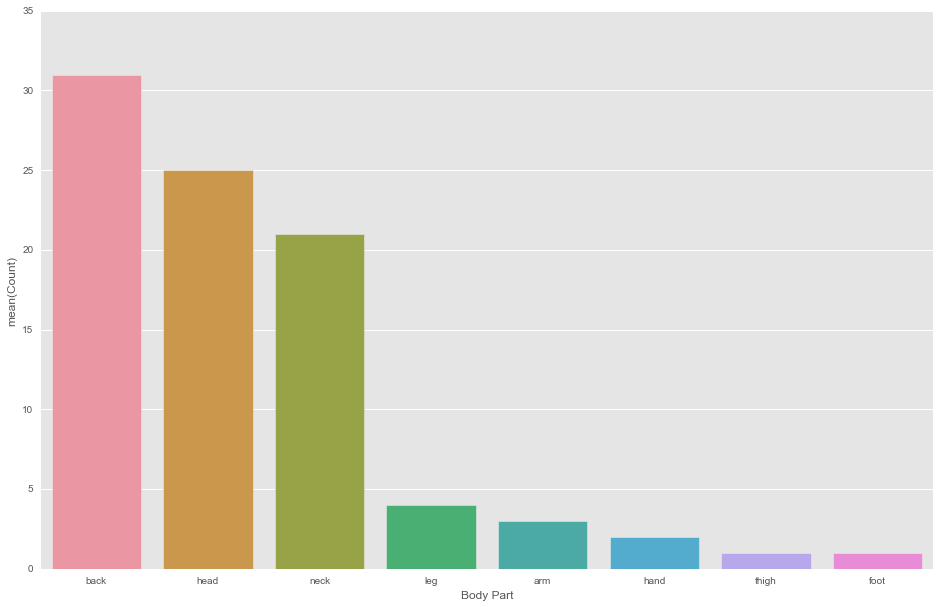

In [62]:
sns.barplot(x = body_parts['Body Part'], y = body_parts['Count'])
plt.ylabel = "Count"
plt.xlabel = "Body Part"

Turns out back, head, neck are the most commonly attacked body parts for dogs. This maybe makes sense...dogs are closer to person sized and probably want to go for heads and necks (high consequence injury areas) more than dragging a person underwater (i.e. how sharks go for legs).

Now let's investigate if we can tell something about restraints. Are restraints involved in lots of these attacks? Do they seem to be an influence?

   Restraint Type  Count
0         chained     45
1           fence     17
2           chain     16
3          kennel     11
4          fenced     11
5            tied      5
6           leash      4
7          collar      3
8            cage      3
9        tethered      3
10         tether      1
11            tie      1


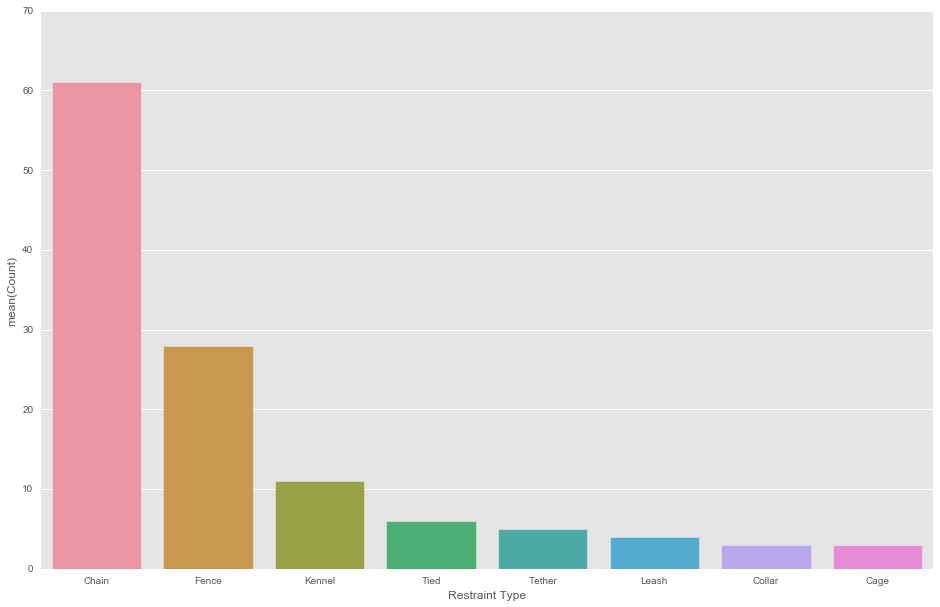

In [63]:
restraint = ['chain', 'chained', 'collar', 'collared', 'cage', 'caged', 'fence', 'fenced', "tie", 'tied', "tether", "tethered", "muzzle", "muzzled", "leash", "leashed", "kennel", "kenneled"]
restraint = [i for i in injuries if i in restraint]
rest1 = FreqDist(restraint)
rest_com = (rest1.most_common())
rests = pd.DataFrame(rest_com, columns = ['Restraint Type', 'Count'])
chain = rests['Count'][0] + rests['Count'][2]
fence = rests['Count'][1] + rests['Count'][3]
rests2 = pd.DataFrame({'Restraint Type': ['Chain','Fence', 'Kennel', 'Tied', 'Tether', 'Leash', 'Collar', 'Cage'], 'Count': [61, 28, 11, 6, 5, 4, 3, 3]})
print(rests)
sns.barplot(x = rests2['Restraint Type'], y = rests2['Count'])
plt.ylabel = "Count"
plt.xlabel = "Restraint Type"

Interestingly, a number of these attacks do include a restraint of some sort. Chain is highest, while cage is lowest. It seems that chaining a dog is not the best strategy - whether this is an unsuccessful restraint or whether the chaining has something to do with dog aggression, remains to be seen.

http://www.humanesociety.org/issues/chaining_tethering/facts/chaining_tethering_facts.html?referrer=https://www.google.com/

(-0.5, 1023.5, 973.5, -0.5)

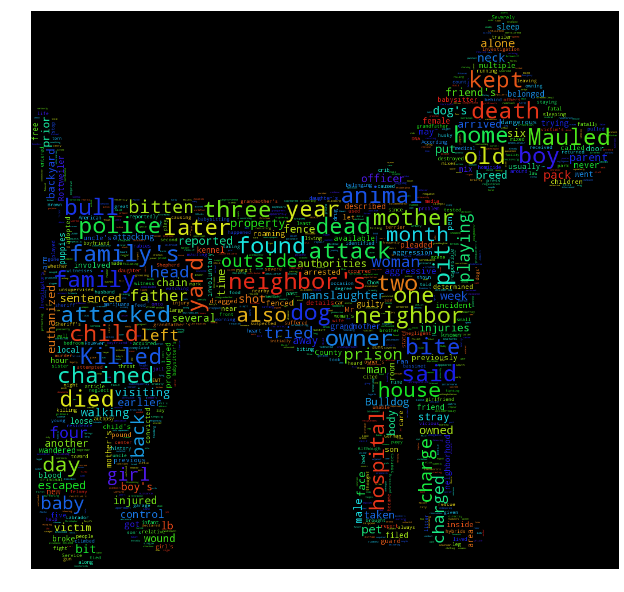

In [64]:
from wordcloud import WordCloud
from PIL import Image
dog_mask = np.array(Image.open("C:/Users/Ellen/Documents/GitHub/FinalProject/dog_img.png"))
wordcloud = WordCloud(background_color = "black", mask = dog_mask, max_words = 2000, max_font_size = 40)
injcloud = wordcloud.generate(injtextdog)
plt.imshow(injcloud, cmap = 'spring') # can't get color scheme to change unfortunately
plt.axis('off')

Here, we wanted to do a visual representation of these words as well. As with sharks, this only qualititatively tells us something, but we see that "mauled" is common, as is "killed", "family", "yard", "kept", "chained", among others. There are also many numbers and many references to children, which is unsurprising as dogs are smaller animals and more likely to attack children rather than adults. 

http://www.chp.edu/injury-prevention/safety/home-and-yard/dog-bites/facts-and-figures

# Bears

In [65]:
# Bear Data Import & Cleaning
bb0 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[0] 
bb2 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[2]
bb4 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[4]
bb7 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[7]
bb10 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[10]
bb13 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[13]
bb16 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[16]
bb18 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[18]
bb20 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[20]
bb24 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[24]
#now all brown bear attacks gb=grizzly bear
bb1 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[1] 
bb3 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[3]
bb5 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[5]
bb8 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[8]
bb11 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[11]
bb14 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[14]
bb17 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[17]
bb19 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[19]
bb21 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[21]
bb22 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[22]
bb23 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[23]
bb25 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[25]
bb27 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[27]
bb28 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[28]
bb29 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[29]
bb30 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[30]
bb31 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[31]
bb32 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[32]
#now all polar bear attacks pb=polar bear
bb6 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[6] 
bb9 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[9]
bb12 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[12]
bb15 = pd.read_html('https://en.wikipedia.org/wiki/List_of_fatal_bear_attacks_in_North_America')[15]
black_bears = [bb0, bb2, bb4, bb7, bb10, bb13, bb16, bb18, bb20, bb24]
black_bears = pd.concat(black_bears)

#Marginal cleaning of data and adding column "Species" 
black_bears = black_bears.reset_index(drop=True)
black_bears = black_bears.ix[1:]
#Labeling all columns
black_bears.columns = ["Basic Info", "Date", "Type of Bear", "Location","Description"]
#Making column or random entries 
black_bears['Species'] = pd.Series(np.random.randn(len(black_bears['Basic Info'])), index=black_bears.index)
#replacing entries with species info str
black_bears.loc[black_bears['Species'] != 0, 'Species'] = "Black Bear"
#removing repeated header labels from concatenation of wiki tables
black_bears = black_bears[(black_bears["Type of Bear"]!="Type")]

#The above steps are now repeated for brown bears and polar bear tables as well

brown_bears = [bb1, bb3, bb5, bb8, bb11, bb14, bb17, bb19, bb21, bb22, bb23, bb25, bb27, bb28, bb29, bb30, bb31, bb32]
brown_bears = pd.concat(brown_bears)

brown_bears = brown_bears.reset_index(drop=True)
brown_bears = brown_bears.ix[1:]
brown_bears.columns = ["Basic Info", "Date", "Type of Bear", "Location","Description"]
brown_bears['Species'] = pd.Series(np.random.randn(len(brown_bears['Basic Info'])), index=brown_bears.index)
brown_bears.loc[brown_bears['Species'] != 0, 'Species'] = "Brown Bear"
brown_bears = brown_bears[(brown_bears["Type of Bear"]!="Type")]

polar_bears = [bb6, bb9, bb12, bb15]
polar_bears = pd.concat(polar_bears)

polar_bears = polar_bears.reset_index(drop=True)
polar_bears = polar_bears.ix[1:]
polar_bears.columns = ["Basic Info", "Date", "Type of Bear", "Location","Description"]
polar_bears['Species'] = pd.Series(np.random.randn(len(polar_bears['Basic Info'])), index=polar_bears.index)
polar_bears.loc[polar_bears['Species'] != 0, 'Species'] = "Polar Bear"
polar_bears = polar_bears[(polar_bears["Type of Bear"]!="Type")]

#Combining all bear data into one large dataframe
all_bears = [black_bears, brown_bears, polar_bears]
all_bears = pd.concat(all_bears)
all_bears = all_bears.reset_index(drop=True)
all_bears.head()

,Basic Info,Date,Type of Bear,Location,Description,Species
0,"Daniel Ward O'Connor, 27, male","May 10, 2015",Wild,"near Mackenzie, British Columbia",Ward was killed by a bear while he slept near ...,Black Bear
1,"Darsh Patel, 22, male","September 21, 2014",Wild,"near West Milford, New Jersey",Patel was about to begin hiking with four frie...,Black Bear
2,"Lorna Weafer, 36, female","May 7, 2014",Wild,"near Fort McMurray, Alberta","Weafer, a Suncor worker was attacked at the re...",Black Bear
3,"Robert Weaver, 64, male","June 6, 2013",Wild,"George Lake near Delta Junction, Alaska",Weaver was attacked by a black bear while walk...,Black Bear
4,"Lana Hollingsworth, 61, female","July 25, 2011",Wild,"Pinetop-Lakeside, Arizona",Hollingsworth was attacked by a 250 lb (113.4 ...,Black Bear


## Geospatial Distribution of Bear Attacks

### Location & Linear Regression

In [66]:
all_bears.Location[all_bears.Location=='Glacier National Park (U.S.)'] = 'Glacier National Park (U.S.), Montana'
all_bears.Location[all_bears.Location=='Yellowstone National Park'] = 'Yellowstone National Park, Montana'
all_bears.Location[all_bears.Location=='Gallatin National Forest'] = 'Gallatin National Forest, Montana'
all_bears.Location[all_bears.Location=='Glacier National Park (Canada)'] = 'Glacier National Park (Canada), British Columbia'
all_bears.Location[all_bears.Location=='Glacier National Park (U.S.)'] = 'Glacier National Park (U.S.), Montana'
all_bears.Location[all_bears.Location=='Southern Alberta'] = 'Southern Alberta, Alberta'
all_bears.Location[all_bears.Location=='Banff National Park'] = 'Banff National Park, Alberta'
all_bears.Location[all_bears.Location=='Jasper National Park'] = 'Jasper National Park, Alberta'

all_bears.Location[all_bears.Location=='Big Basin Redwoods State Park'] = 'Big Basin Redwoods State Park, California'
all_bears.Location[all_bears.Location=='Mount San Antonio'] = 'Mount San Antonio, California'
all_bears.Location[all_bears.Location=='New York City'] = 'New York City, New York'
all_bears.Location[all_bears.Location=='Salmon River (Idaho)'] = 'Salmon River, Idaho'
all_bears.Location[all_bears.Location=='Leo Creek, British Columbia, near Granisle, British Columbia'] = 'Leo Creek, British Columbia'
all_bears.Location[all_bears.Location=='Waterton Lakes National Park']='Waterton Lakes National Park, Alberta'
all_bears.Location[all_bears.Location=='near Rocky Mountain National Park'] = 'Rocky Mountain National Park, Colorado'
all_bears.Location[all_bears.Location=='Colonia Pacheco, Chihuahua, Mexico']='Chihuahua, Mexico'
all_bears.Location[all_bears.Location==''] = ''
all_bears.Location[all_bears.Location=='']=''
all_bears.Location[all_bears.Location==''] = ''
all_bears.Location[all_bears.Location=='']=''

Bear_attacks_known=all_bears[all_bears['Location']!='Location']
#print(Bear_attacks_known['Location'])
location_list=[]
for i in Bear_attacks_known['Location']:
    p=str(i)
    q=str(p.split(", ")[1])
    location_list.append(q)


#print(location_list)
Bear_attacks_state=pd.DataFrame.from_items([('State', location_list),('Attack', list(1 for x in range(len(location_list))))])
aggregated3 = Bear_attacks_state[['State','Attack']].groupby("State").count()
#print(aggregated3)


country_info = pd.read_csv("demo_3.csv", encoding = 'iso-8859-1')
d1=country_info.set_index('Country', drop=False)
Bear_pop_density=pd.concat([d1, aggregated3], axis=1,join_axes=[aggregated3.index])
Bear_attacks_state_new=pd.concat([d1, Bear_attacks_state], axis=1,join_axes=[d1.index])
#print(dog_pop_density)

##Linear Regression
import statsmodels.formula.api as sm

model3 = sm.ols(formula="Attack ~ Density", data=Bear_pop_density)
model3_result = model3.fit()
print(model3_result.params[0], '\n', model3_result.params[1])
print(model3_result.summary())

5.27401635199 
 -0.00524665202474
                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.711
Date:                Fri, 02 Dec 2016   Prob (F-statistic):              0.200
Time:                        13:54:00   Log-Likelihood:                -104.51
No. Observations:                  34   AIC:                             213.0
Df Residuals:                      32   BIC:                             216.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.2

In [76]:
# Geospatial Analysis for Bears
country_info['State']=country_info['Country']
#Bear_attacks_state_new=pd.concat([d1, d2], axis=1,join_axes=[d2.index])
Bear_attacks_state_new=pd.merge(Bear_attacks_state, country_info, on='State')

import numpy as np
from ggplot import *
import matplotlib.cm as cm



import folium
map3 = folium.Map(location=[38.0, -91.8750],
                   zoom_start=3,
                   tiles='Stamen Terrain')
df_map_Bear=Bear_attacks_state_new[['Long','Lat','Density']]


for i in range(0,len(df_map_Bear)):
        folium.Marker(location=[df_map_Bear.iloc[i]['Lat'], df_map_Bear.iloc[i]['Long']],
              popup=str(df_map_Bear.iloc[i]['Density']),          
              icon=folium.Icon(color=df_map_Bear.iloc[i]['Density'])
             ).add_to(map3)

        
map3


ImportError: No module named 'folium'

#### Geospatial Distribution Interpretation: 

Bear attacks in North America are unsurprisingly common in northern areas (northwestern US, Canada, Alaska) although they do happen throughout the country. 

### Natural Language Analysis of Bear "Descriptions"
Let's do a similar NLP with Bears that we did with sharks and dogs!

In [68]:
## Natural Language Processing for Description Column
description = all_bears['Description'].tolist()
len(description) #now we have a list of all injury descriptions
freqinj = FreqDist(description)
#print('\n', descript.most_common(50))
descsplit = [words for segments in description for words in (str(segments)).split()];
desctxt = ' '.join(str(x) for x in descsplit) # made list all one long string
#print(desctxt)

In [69]:
f = open('descript_bears.txt')
raw = f.read()
tokens = nltk.wordpunct_tokenize(raw)
descriptions = nltk.Text(tokens) #turns text file into NLTK file for NLP
desc_txt = nltk.Text(tokens) # keep one in nltk.text format, not list
descriptions = [w.lower() for w in descriptions if w.isalpha()] # removes punctuation
stop = set(stopwords.words('english')) # sets stopwords
#badwords = ['bitten', 'bite']
descriptions = [i for i in descriptions if i not in stop]
#injuries = [i for i in injuries if i not in badwords]
desctextdist = nltk.FreqDist(descriptions)
print('\n', desctextdist.most_common(20));
print('\n', desctextdist['black'])


 [('bear', 259), ('killed', 112), ('attacked', 58), ('found', 51), ('shot', 49), ('park', 42), ('attack', 39), ('near', 33), ('grizzly', 33), ('later', 32), ('two', 29), ('mauled', 28), ('body', 26), ('national', 25), ('bears', 24), ('area', 18), ('hunting', 17), ('died', 16), ('cabin', 15), ('campsite', 15)]

 13


Bear is the most commonly found word (which isn't surprising at all) but it is followed by killed which gives us some idea of fatality, I suppose. Attacked and found are also not suprising. Although "found" is maybe different - signifies remoteness of many of these attacks? Maul is common, like with dogs. We also see "national", "area", "hunting", "campsite", and "cabin", which all indicate some sort of outdoor activity - not surprising!

So like with dogs and sharks - what body parts are most commonly attacked?

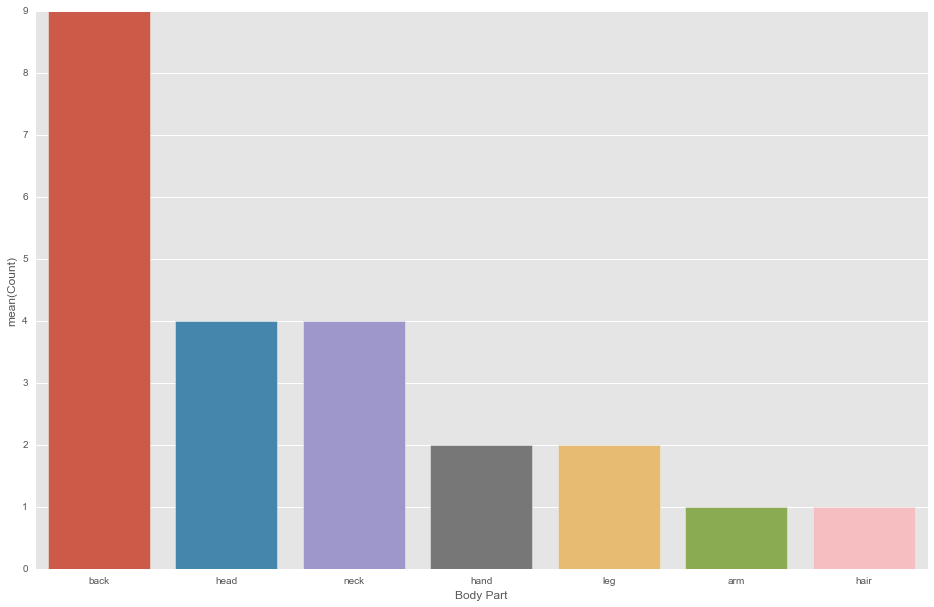

In [70]:
parts = ['foot', 'leg', 'arm', 'shoulder', 'ankle', 'hand', 'knee', 'abdomen', 'forearm', 'calf', 'thigh', 'heel', 'head', 'elbow', 'hair', 'nape', 'neck', 'back', 'waist', 'torso', 'hip', 'wrist', 'buttock']
bodyparts = [i for i in descriptions if i in parts]
bodyparts1 = FreqDist(bodyparts)
bodyparts_com = (bodyparts1.most_common())
body_parts = pd.DataFrame(bodyparts_com, columns = ['Body Part', 'Count'])
sns.barplot(x = body_parts['Body Part'], y = body_parts['Count'])
plt.ylabel = "Count"
plt.xlabel = "Body Part"

Looks like back, head, and neck are most common. Not too surprising - a bear is large and can attack large body parts. We don't really have a lot of data here - probably not enough to say anything definitively.

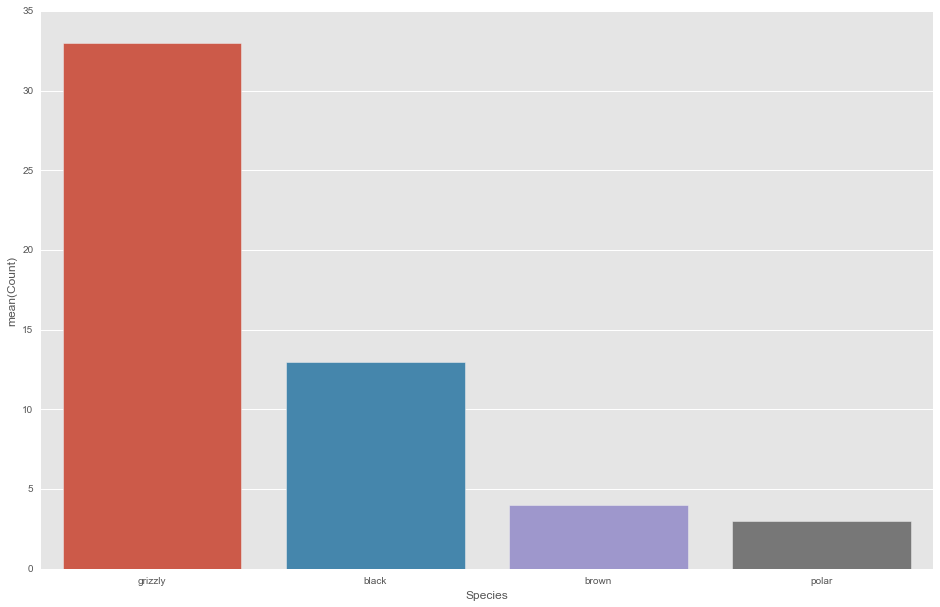

In [71]:
species = ['grizzly', 'black', 'brown', 'polar', 'kodiak', 'koala', 'panda']
spec = [i for i in descriptions if i in species]
spec1 = FreqDist(spec)
speccom = (spec1.most_common())
specs = pd.DataFrame(speccom, columns = ['Species', 'Count'])

sns.barplot(x = specs['Species'], y = specs['Count'])
plt.ylabel = "Count"
plt.xlabel = "Species"

Unsurprisingly, grizzly bears are the most common. We were surprised that we didn't see any occurrences of kodiak bears, but this is potentially that they're classified as grizzlies or that there are so few of those bears that they don't show up as much (they're also in remote areas). 

### Interpretation

In [72]:
desc_txt.collocations()

National Park; British Columbia; grizzly bear; black bear; partially
consumed; Glacier National; first fatal; days later; reported missing;
wildlife officials; grizzly bears; conservation officers; hunting
trip; Park Zoo; Yellowstone National; two cubs; pet bear; National
Forest; became widely; military base


National forests and parks show up a lot. Grizzly bears (not surprising), cubs, hunting, and wildlife officials also not surprising. Outliers here might be "miltary base", and "Park Zoo". 

In [73]:
desc_txt.concordance("National")

Displaying 25 of 25 matches:
r attack in a southeastern U . S . National Park . While hovering over Bradley
in Cameron Creek in Waterton Lakes National Park . She died en route to a Calg
erty , just west of Rocky Mountain National Park , and north of Grand Lake . T
tside of her home on the Marquette National Forest ( now the Hiawatha National
National Forest ( now the Hiawatha National Forest ) in Michigan . She was dra
earch alone in the Bridger - Teton National Forest in northwest Wyoming . Afte
tal bear attack recorded in Denali National Park .[ 23 ] After passers - by sp
 ] An initial investigation by the National Park Service found the bear ' s ac
reek Drainage area of the Shoshone National Forest , just east of Yellowstone 
 Forest , just east of Yellowstone National Park . The bear was trapped and tr
en relocated from Canmore to Banff National Park .[ 78 ] Treadwell and Huguena
ear Soldotna , Alaska in the Kenai National Wildlife Refuge . Troopers found C
n the Two Medicine area

This was used to try and find locations to analyze in the next section.

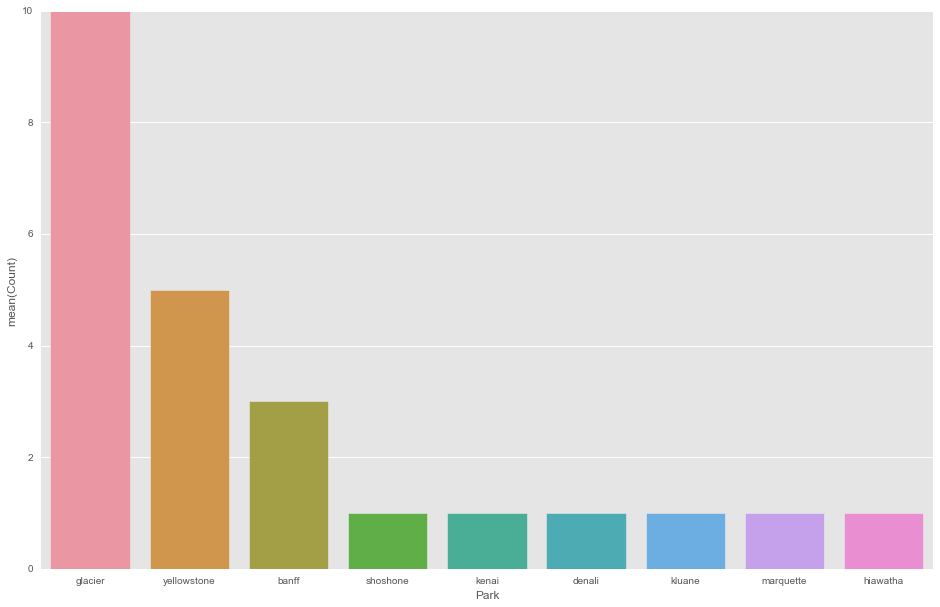

In [74]:
parks = ['glacier', 'banff', 'denali', 'yellowstone', 'kenai', 'smoky', 'kluane', 'shoshone', 'rocky mountain', 'glacier bay', 'hiawatha', 'marquette', 'waterton lakes']
park = [i for i in descriptions if i in parks]

park1 = FreqDist(park)
parkcom = (park1.most_common())
parkss = pd.DataFrame(parkcom, columns = ['Park', 'Count'])

sns.barplot(x = parkss['Park'], y = parkss['Count'])
plt.ylabel = "Count"
plt.xlabel = "Park"

This is not a full sampling of all of the public lands where bear attacks occur, it is simply the ones that showed up in the collocation analysis. However, we do see that Glacier, Yellowstone, and Banff are highly represented - not surprising! What is surprising is that Denali and Kenai (Alaskan parks) are less represented. Potentially because of fewer visitors?

https://www.nps.gov/yell/learn/nature/injuries.htm

http://news.nationalgeographic.com/2015/09/150916-bears-attacks-animals-science-north-america-grizzlies/

(-0.5, 1614.5, 899.5, -0.5)

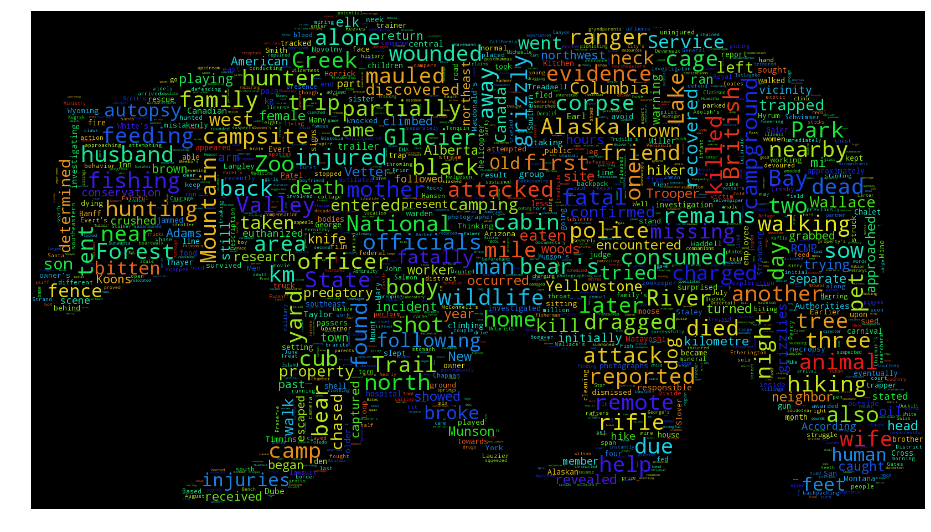

In [75]:
from wordcloud import WordCloud
from PIL import Image
bear_mask = np.array(Image.open("C:/Users/Ellen/Documents/GitHub/FinalProject/bear_img.png"))
wordcloud = WordCloud(background_color = "black", mask = bear_mask, max_words = 2000, max_font_size = 40)
injcloud = wordcloud.generate(desctxt)
plt.imshow(injcloud)
plt.axis('off')

Here we see a much more "distributed" wordcloud. There aren't as many big words (more common words) in contrast to the other two animal attack types. We see lots of words that indicate outdoor activity (hiking, trail, wildlife, lake, mountain, camp, etc.) and even some location names. 

# Conclusions

#### Sharks:

The NLP analysis for sharks revealed that six out of the top ten injuries are reported on lower extremities, followed by upper extremities. This makes sense after looking at activities and with our understanding of how sharks attack (see above). We also discovered that unsurprisingly, shark attacks are most common in countries with large coastlines and large numbers of people recreating in shark habitats.

Machine learniing on the shark dataset has not proven to be so effective. The categorical variables are not set up in a way that give much power to these algorithms. The dataset was maybe not ideal for this type of analysis. For example for most of the methods our accuracy was hovering around 75%. This is fairly close to the level of victims that survived a shark attack. Your prediction could essentiall be that everyone ALWAYS survives and your accuracy would be about the same. That is like answering C for every question on every multiple choice test you've ever taken and graduating with a C average. Now that is a bit silly so we can infer that this dataset was not optimal for these classification algorithms. We didn't do these machine learning procedures for bears and dogs because we didn't have the same outcomes. Therefore, the bears and dogs datasets will have NLP exploration only.

#### Dogs:

The NLP analysis shows that dog attacks often involve some sort of restraint mechanism. There are higher numbers of attacks that involve chains - there are a number of reports that chaining or tethering a dog actually can increase aggression (see above). 

We also see mentions of children and old people, both of whom are more susceptible to being fatally attacked due to being smaller or more frail, or less able to defend themselves.

Many attacks involve body parts that have higher "acerage" as in heads, necks, torsos. These body parts are easier for a dog to attack and potentially cause the most damage - which makes sense becuase dogs are smaller and attack people differently than sharks would. 

#### Bears:

We see that grizzly bears are more commonly attacking humans than black bears, brown bears, or polar bears. We also see that large, northern National Parks (Glacier, Denali, Yellowstone, Kenai) are hotspots for bear attacks. This is logical as these areas are bear habitats and the most likely places for people to run into bears. The geospatial analysis shows that these attacks (which are only recorded for North America) happen all over the continent but many happen in northern wooded areas, as one would expect.

We see that bears typically attack backs, heads, and necks - similar to dog attack body parts.

Our wordcloud statistics show that there are a number of outdoor activities mentioned (hiking, camping, fishing, hunting) involved in many of these attacks. Similarly, words like "found", "eaten", "discovered" insinuate that these attacks happen in remote locations where others are not immediately aware of the attack.

## What would we do differently next time?

We had significant difficulties with acquiring and cleaning data. We would have liked more data on bears and dogs, plus more numerical data rather than categorical data.

We were unable to map population densities, although we regressed it overall by country. This was unfortunate because we would have liked to be able to map more local population density and match it better to locations of attacks by all three animals. However, many of the animal attack locations were not specific enough to pinpoint locations either - so better data would have been helpful here.